In [1]:
from mewpy.simulation import solvers
from mewpy.simulation import set_default_solver
set_default_solver('glpk')

In [2]:
solvers

['glpk']

# load unconstrained human1 model

In [3]:
from cobra.io.sbml import read_sbml_model
model = read_sbml_model('Human-GEM-annotated.xml')
model

Scaling...
 A: min|aij| =  1.000e+00  max|aij| =  1.000e+00  ratio =  1.000e+00
Problem data seem to be well scaled


Name,HumanGEM
Memory address,0x0119029eb0
Number of metabolites,8400
Number of reactions,13096
Number of groups,143
Objective expression,1.0*biomass_human - 1.0*biomass_human_reverse_fb2f2
Compartments,"Cytosol, Extracellular, Lysosome, Endoplasmic reticulum, Mitochondria, Peroxisome, Golgi apparatus, Nucleus, Inner mitochondria"


In [4]:
model.summary()

Metabolite,Reaction,Flux,C-Number,C-Flux
m00350s,EX_13_cis_retn[e],0.01938,20,0.00%
m01417s,EX_1a25dhvitd3[e],0.003867,27,0.00%
m00674s,EX_2pg[e],0.3261,3,0.00%
m01231s,EX_CE1617[e],0.003867,20,0.00%
m02318s,EX_CE5786[e],38.17,56,0.74%
m02479s,EX_HC00900[e],867.9,4,1.20%
m02965s,EX_HC02192[e],246.1,26,2.22%
m02000s,EX_HC02193[e],1000,26,9.00%
m02871s,EX_ahcys[e],1000,14,4.85%
asntyrthr_s,EX_asntyrthr[e],28.59,17,0.17%


# load and apply media conditions

In [5]:
#this was determined in a previous notebook. All specified CCLE media conditions were added, with custom high glucose level.
#all non-specified reactions initially switched off, then if this dropped growth to zro, reaction was reopened.
import pandas as pd
media_conditions = pd.read_csv('/Users/katemeeson/Library/Mobile Documents/com~apple~CloudDocs/MRC-DTP_PhD_UoM/Datasets/Alternative datasets/CCLE main spreadsheets/high_gluc_dict2.csv')
media = {}
for n in range(len(media_conditions['reaction'])):
    media[media_conditions.iloc[n,1]] = (media_conditions.iloc[n,2], media_conditions.iloc[n,3])
#set glucose concentration as high
media['HMR_9034'] = (-4.5,1000)
media

{'HMR_7108': (0.0, 1000),
 'HMR_7110': (0.0, 1000),
 'HMR_7112': (0.0, 1000),
 'HMR_7114': (0.0, 1000),
 'HMR_7116': (0.0, 1000),
 'HMR_7118': (0.0, 1000),
 'HMR_7120': (0.0, 1000),
 'HMR_7122': (0.0, 1000),
 'HMR_7124': (0.0, 1000),
 'HMR_7126': (0.0, 1000),
 'HMR_9023': (0.0, 1000),
 'HMR_9024': (0.0, 1000),
 'HMR_9032': (0.0, 1000),
 'HMR_9808': (0.0, 1000),
 'HMR_9809': (0.0, 1000),
 'HMR_9810': (0.0, 1000),
 'HMR_9811': (0.0, 1000),
 'HMR_9812': (0.0, 1000),
 'HMR_9813': (0.0, 1000),
 'HMR_9814': (0.0, 1000),
 'HMR_9815': (0.0, 1000),
 'HMR_9816': (0.0, 1000),
 'HMR_9033': (0.0, 1000),
 'HMR_9034': (-4.5, 1000),
 'HMR_9035': (-4.2e-05, 1000),
 'HMR_9036': (0.0, 1000),
 'HMR_9037': (0.0, 1000),
 'HMR_9038': (0.0, 1000),
 'HMR_9039': (-0.05447, 1000),
 'HMR_9040': (-0.05905, 1000),
 'HMR_9041': (0.0, 1000),
 'HMR_9042': (-0.01724, 1000),
 'HMR_9043': (-0.03548, 1000),
 'HMR_9044': (0.0, 1000),
 'HMR_9045': (-0.00902, 1000),
 'HMR_9046': (-0.05285, 1000),
 'HMR_9047': (0.0, 1000),
 '

In [6]:
from mewpy.simulation import get_simulator
media_only_simulation = get_simulator(model, envcond = media)
media_only_result = media_only_simulation.simulate()
print(media_only_result)

objective: 0.07246376811594203
Status: OPTIMAL
Constraints: OrderedDict([('HMR_7108', (0.0, 1000)), ('HMR_7110', (0.0, 1000)), ('HMR_7112', (0.0, 1000)), ('HMR_7114', (0.0, 1000)), ('HMR_7116', (0.0, 1000)), ('HMR_7118', (0.0, 1000)), ('HMR_7120', (0.0, 1000)), ('HMR_7122', (0.0, 1000)), ('HMR_7124', (0.0, 1000)), ('HMR_7126', (0.0, 1000)), ('HMR_9023', (0.0, 1000)), ('HMR_9024', (0.0, 1000)), ('HMR_9032', (0.0, 1000)), ('HMR_9808', (0.0, 1000)), ('HMR_9809', (0.0, 1000)), ('HMR_9810', (0.0, 1000)), ('HMR_9811', (0.0, 1000)), ('HMR_9812', (0.0, 1000)), ('HMR_9813', (0.0, 1000)), ('HMR_9814', (0.0, 1000)), ('HMR_9815', (0.0, 1000)), ('HMR_9816', (0.0, 1000)), ('HMR_9033', (0.0, 1000)), ('HMR_9034', (-4.5, 1000)), ('HMR_9035', (-4.2e-05, 1000)), ('HMR_9036', (0.0, 1000)), ('HMR_9037', (0.0, 1000)), ('HMR_9038', (0.0, 1000)), ('HMR_9039', (-0.05447, 1000)), ('HMR_9040', (-0.05905, 1000)), ('HMR_9041', (0.0, 1000)), ('HMR_9042', (-0.01724, 1000)), ('HMR_9043', (-0.03548, 1000)), ('HMR_9044

In [7]:
media_only_summary = model.summary()
media_only_summary

Metabolite,Reaction,Flux,C-Number,C-Flux
m01359s,EX_HC00009[e],0.03767,1569,6.58%
m02837s,EX_M02837[e],4.194E-05,36,0.00%
m02122s,EX_hxcoa[e],1.14,27,3.43%
nfdoh_s,EX_nfdoh[e],32.9,16,58.62%
m02328s,HMR_10027,6.878,31,23.74%
m01965s,HMR_9034,4.5,6,3.01%
m02184s,HMR_9039,0.05447,6,0.04%
m02360s,HMR_9040,0.05905,6,0.04%
m02471s,HMR_9042,0.01724,5,0.01%
m02724s,HMR_9043,0.03548,9,0.04%


In [8]:
media_only_result.find(['biomass_human'])

,Flux rate
Reaction ID,
biomass_human,0.072464


## essential reactions and genes, media conditions only

In [9]:
%store -r media_only_essential_reactions
%store -r media_only_essential_genes

# load and create expression dictionary for transcriptomics data (normalised, CCLE)

In [10]:
t = pd.read_csv(r'/Users/katemeeson/Library/Mobile Documents/com~apple~CloudDocs/MRC-DTP_PhD_UoM/Datasets/Alternative datasets/CCLE main spreadsheets/ccle_tomics.csv', index_col = [0])

gene_exp = t.iloc[2,:]
g_list = []
for k in gene_exp.keys():
    g_list.append(k)

g_ensembl = []
for n in range(len(g_list)):
    if 'ENS' not in (g_list[n].split())[0]:
        g_ensembl.append((g_list[n].split())[1])
    if 'ENS' in (g_list[n].split())[0]:
        g_ensembl.append((g_list[n].split())[0])

vs = []
for v in gene_exp:
    vs.append(v)
    
gene_exp_dict = {}
for n in range(len(g_ensembl)):
    gene_exp_dict[g_ensembl[n]] = vs[n]
gene_exp_dict

{'ENSG00000000003': 2.776103988,
 'ENSG00000000005': 0.070389328,
 'ENSG00000000419': 6.323009711,
 'ENSG00000000457': 1.989139007,
 'ENSG00000000460': 2.541019153,
 'ENSG00000000938': 0.201633861,
 'ENSG00000000971': 1.735522177,
 'ENSG00000001036': 5.317593505,
 'ENSG00000001084': 5.486070744,
 'ENSG00000001167': 3.949534933,
 'ENSG00000001460': 1.815575429,
 'ENSG00000001461': 2.778208576,
 'ENSG00000001497': 4.629939409,
 'ENSG00000001561': 0.910732662,
 'ENSG00000001617': 3.791814071,
 'ENSG00000001626': 0.150559677,
 'ENSG00000001629': 4.894817763,
 'ENSG00000001630': 5.294988268,
 'ENSG00000001631': 4.012568674,
 'ENSG00000002016': 3.09592442,
 'ENSG00000002079': 0.475084883,
 'ENSG00000002330': 5.126394738,
 'ENSG00000002549': 5.917431755,
 'ENSG00000002586': 7.205060111,
 'ENSG00000002587': 0.070389328,
 'ENSG00000002726': 0.042644337,
 'ENSG00000002745': 0.084064265,
 'ENSG00000002746': 0.22650853,
 'ENSG00000002822': 3.129283017,
 'ENSG00000002834': 6.520736527,
 'ENSG000000

# sort model reactions accoring to their reaction rules

In [11]:
ANDs = []
ORs = []
ANDORs = []
one_gene = []
no_gene = []

for r in model.reactions:
    if 'and' in r.gene_reaction_rule and 'or' not in r.gene_reaction_rule:
        ANDs.append(r.id)
    if 'and' in r.gene_reaction_rule and 'or' in r.gene_reaction_rule:
        ANDORs.append(r.id)
    if 'or' in r.gene_reaction_rule and 'and' not in r.gene_reaction_rule:
        ORs.append(r.id)
    if len(r.gene_reaction_rule) == 0:
        no_gene.append(r.id)
    if len(r.gene_reaction_rule) != 0:
        if 'or' in r.gene_reaction_rule:
            continue
        elif 'and' in r.gene_reaction_rule:
            continue
        else:
            one_gene.append(r.id)

print('AND rules: ', len(ANDs))
print('ANDOR rules: ', len(ANDORs))
print('OR rules: ', len(ORs))
print('ONE GENE rules: ', len(one_gene))
print('NO GENE rules: ', len(no_gene))
print('Proportion of model not annotated: ', len(no_gene)/len(model.reactions)*100, '%')
print('Proportion of model which IS annotated: ', 100-(len(no_gene)/len(model.reactions)*100), '%')
print('Total Reactions = ', len(model.reactions))
print(len(ORs)+len(ANDs)+len(ANDORs)+len(one_gene)+len(no_gene))

AND rules:  653
ANDOR rules:  129
OR rules:  3972
ONE GENE rules:  3282
NO GENE rules:  5060
Proportion of model not annotated:  38.63775198533904 %
Proportion of model which IS annotated:  61.36224801466096 %
Total Reactions =  13096
13096


# integrate transcriptomics into one-gene rules

# one-gene, forward direction

In [12]:
one_gene_forward = []
one_gene_reversible = []
for r in one_gene:
    if model.reactions.get_by_id(r).reversibility == True:
        one_gene_reversible.append(r)
    else:
        one_gene_forward.append(r)
print('number of reversible, one gene reactions =', len(one_gene_reversible))
print('number of forward, one gene reactions =', len(one_gene_forward))

number of reversible, one gene reactions = 1074
number of forward, one gene reactions = 2208


In [13]:
one_gene_constrained_reactions = {}
for r in one_gene_forward:
    if r not in media.keys():
        if r not in media_only_essential_reactions:
            if model.reactions.get_by_id(r).gene_reaction_rule not in media_only_essential_genes:
                if model.reactions.get_by_id(r).gene_reaction_rule in gene_exp_dict.keys(): # or set in excess in dict but essential genes row should mean we dont search these core reactions
                    if gene_exp_dict[model.reactions.get_by_id(r).gene_reaction_rule] != (0,0): #don't allow any bounds to be zero
                        model.reactions.get_by_id(r).bounds = (0,(gene_exp_dict[model.reactions.get_by_id(r).gene_reaction_rule]))
                        solution = model.optimize()
                        if solution.fluxes['biomass_human'] ==0:
                            print(r, ':', 'constrained bounds', model.reactions.get_by_id(r).bounds, solution.fluxes['biomass_human'])
                            model.reactions.get_by_id(r).bounds = (0,1000)
                            solution = model.optimize()
                            print(r, ':', 're-opened bounds', model.reactions.get_by_id(r).bounds, solution.fluxes['biomass_human'])
                            one_gene_constrained_reactions[r] = model.reactions.get_by_id(r).bounds
                        if solution.fluxes['biomass_human'] !=0:
                            print(r, ':', model.reactions.get_by_id(r).bounds, solution.fluxes['biomass_human'])
                            one_gene_constrained_reactions[r] = model.reactions.get_by_id(r).bounds

HMR_3907 : (0, 7.708325207) 0.07246376811594203
HMR_4097 : (0, 5.679198571) 0.07246376811594203
HMR_4108 : (0, 5.679198571) 0.07246376811594203
HMR_4133 : (0, 5.679198571) 0.07246376811594203
HMR_4360 : (0, 2.516015147) 0.07246376811594203
HMR_4372 : (0, 4.394376945) 0.07246376811594203
HMR_7747 : (0, 4.981396032) 0.07246376811594203
HMR_8360 : (0, 4.278728213) 0.07246376811594203
HMR_8757 : (0, 2.189033824) 0.07246376811594203
HMR_5397 : (0, 5.468257468) 0.07246376811594203
HMR_5399 : (0, 2.272023189) 0.07246376811594203
HMR_5400 : (0, 2.272023189) 0.07246376811594203
HMR_8592 : (0, 5.443938115) 0.07246376811594203
HMR_8589 : (0, 5.443938115) 0.07246376811594203
HMR_8584 : (0, 0.0) 0.07246376811594203
HMR_8585 : (0, 2.443606651) 0.07246376811594203
HMR_3944 : (0, 6.018144529) 0.07246376811594203
HMR_8761 : (0, 1.049630768) 0.07246376811594203
HMR_4310 : (0, 1.049630768) 0.07246376811594203
HMR_4399 : (0, 3.343407822) 0.07246376811594203
HMR_4400 : (0, 6.403949364) 0.07246376811594203


HMR_3778 : (0, 5.13627343) 0.07246376811594261
HMR_3795 : (0, 2.56315813) 0.07246376811594261
HMR_6420 : (0, 2.570462931) 0.07246376811594261
HMR_6422 : (0, 2.570462931) 0.07246376811594261
HMR_6923 : (0, 4.01346226) 0.07246376811594261
HMR_3765 : (0, 5.13627343) 0.07246376811594261
HMR_8787 : (0, 0.731183242) 0.07246376811594261
HMR_3940 : (0, 0.028569152) 0.07246376811594261
HMR_4227 : (0, 4.278728213) 0.07246376811594261
HMR_4231 : (0, 0.298658316) 0.07246376811594261
HMR_4242 : (0, 3.397802962) 0.07246376811594261
HMR_4243 : (0, 3.397802962) 0.07246376811594261
HMR_6707 : (0, 0.50589093) 0.07246376811594261
HMR_6718 : (0, 0.50589093) 0.07246376811594261
HMR_6726 : (0, 0.176322773) 0.07246376811594261
HMR_6728 : (0, 0.378511623) 0.07246376811594261
HMR_6729 : (0, 0.0) 0.07246376811594261
HMR_6731 : (0, 0.50589093) 0.07246376811594261
HMR_6740 : (0, 0.50589093) 0.07246376811594261
HMR_6741 : (0, 0.0) 0.07246376811594261
HMR_6743 : (0, 0.201633861) 0.07246376811594261
HMR_6770 : (0, 4

HMR_2245 : (0, 6.906409617) 0.0724637681159416
HMR_2246 : (0, 6.906409617) 0.0724637681159416
HMR_2247 : (0, 6.906409617) 0.0724637681159416
HMR_2249 : (0, 6.906409617) 0.0724637681159416
HMR_2250 : (0, 6.906409617) 0.0724637681159416
HMR_2251 : (0, 6.906409617) 0.0724637681159416
HMR_2252 : (0, 6.906409617) 0.0724637681159416
HMR_2254 : (0, 6.906409617) 0.0724637681159416
HMR_2255 : (0, 6.906409617) 0.0724637681159416
HMR_2256 : (0, 6.906409617) 0.0724637681159416
HMR_2257 : (0, 6.906409617) 0.0724637681159416
HMR_2307 : (0, 5.13996057) 0.0724637681159416
HMR_2317 : (0, 5.13996057) 0.0724637681159416
HMR_2326 : (0, 5.13996057) 0.0724637681159416
HMR_2334 : (0, 5.13996057) 0.0724637681159416
HMR_2343 : (0, 5.13996057) 0.0724637681159416
HMR_2348 : (0, 5.13996057) 0.0724637681159416
HMR_2354 : (0, 5.13996057) 0.0724637681159416
HMR_2362 : (0, 5.13996057) 0.0724637681159416
HMR_2191 : (0, 5.13996057) 0.0724637681159416
HMR_2202 : (0, 5.13996057) 0.0724637681159416
HMR_2208 : (0, 5.139960

HMR_8212 : (0, 2.121015401) 0.07246376811594214
HMR_8217 : (0, 5.762348816) 0.07246376811594214
HMR_8224 : (0, 4.902556005) 0.07246376811594214
HMR_8226 : (0, 4.902556005) 0.07246376811594214
HMR_8227 : (0, 4.902556005) 0.07246376811594214
HMR_8228 : (0, 4.902556005) 0.07246376811594214
HMR_8233 : (0, 3.845991771) 0.07246376811594214
HMR_8235 : (0, 3.845991771) 0.07246376811594214
HMR_8237 : (0, 3.763411574) 0.07246376811594214
HMR_8238 : (0, 3.763411574) 0.07246376811594214
HMR_8242 : (0, 0.815575429) 0.07246376811594214
HMR_8248 : (0, 5.455491621) 0.07246376811594214
HMR_8249 : (0, 0.214124805) 0.07246376811594214
HMR_8250 : (0, 0.214124805) 0.07246376811594214
HMR_8251 : (0, 0.214124805) 0.07246376811594214
HMR_0673 : (0, 3.98458935) 0.07246376811594214
HMR_0674 : (0, 3.98458935) 0.07246376811594214
HMR_0675 : (0, 3.98458935) 0.07246376811594214
HMR_0676 : (0, 3.98458935) 0.07246376811594214
HMR_0677 : (0, 3.98458935) 0.07246376811594214
HMR_0678 : (0, 3.98458935) 0.0724637681159421

HMR_1609 : (0, 5.290571851) 0.07246376811594214
HMR_1610 : (0, 5.290571851) 0.07246376811594214
HMR_1611 : (0, 5.290571851) 0.07246376811594214
HMR_1613 : (0, 5.290571851) 0.07246376811594214
HMR_1614 : (0, 5.290571851) 0.07246376811594214
HMR_1622 : (0, 4.08236197) 0.07246376811594214
HMR_1660 : (0, 4.300123725) 0.07246376811594214
HMR_1662 : (0, 4.300123725) 0.07246376811594214
HMR_1663 : (0, 4.300123725) 0.07246376811594214
HMR_1667 : (0, 0.150559677) 0.07246376811594214
HMR_1668 : (0, 0.150559677) 0.07246376811594214
HMR_1670 : (0, 0.150559677) 0.07246376811594214
HMR_1673 : (0, 0.014355293) 0.07246376811594214
HMR_1681 : (0, 5.290571851) 0.07246376811594214
HMR_1682 : (0, 5.290571851) 0.07246376811594214
HMR_1685 : (0, 5.290571851) 0.07246376811594214
HMR_1687 : (0, 5.290571851) 0.07246376811594214
HMR_1689 : (0, 5.290571851) 0.07246376811594214
HMR_1691 : (0, 5.290571851) 0.07246376811594214
HMR_1693 : (0, 5.290571851) 0.07246376811594214
HMR_1696 : (0, 4.08236197) 0.072463768115

HMR_8110 : (0, 4.567423758) 0.07246376811594214
HMR_8112 : (0, 4.567423758) 0.07246376811594214
HMR_8113 : (0, 4.567423758) 0.07246376811594214
HMR_8114 : (0, 4.567423758) 0.07246376811594214
HMR_8115 : (0, 4.567423758) 0.07246376811594214
HMR_8116 : (0, 4.567423758) 0.07246376811594214
HMR_8117 : (0, 4.567423758) 0.07246376811594214
HMR_8129 : (0, 5.508428653) 0.07246376811594214
HMR_8130 : (0, 5.508428653) 0.07246376811594214
HMR_8132 : (0, 5.508428653) 0.07246376811594214
HMR_8133 : (0, 5.508428653) 0.07246376811594214
HMR_8135 : (0, 5.508428653) 0.07246376811594214
HMR_8136 : (0, 5.508428653) 0.07246376811594214
HMR_8137 : (0, 5.508428653) 0.07246376811594214
HMR_8138 : (0, 5.508428653) 0.07246376811594214
HMR_8139 : (0, 5.508428653) 0.07246376811594214
HMR_8140 : (0, 5.508428653) 0.07246376811594214
HMR_8141 : (0, 5.508428653) 0.07246376811594214
HMR_8142 : (0, 5.508428653) 0.07246376811594214
HMR_8143 : (0, 5.237640195) 0.07246376811594214
HMR_7661 : (0, 4.522306893) 0.0724637681

HMR_5005 : (0, 5.419201774) 0.07246376811594206
HMR_5038 : (0, 0.084064265) 0.07246376811594206
HMR_5039 : (0, 0.084064265) 0.07246376811594206
HMR_5040 : (0, 0.084064265) 0.07246376811594206
HMR_5041 : (0, 0.042644337) 0.07246376811594206
HMR_5241 : (0, 5.727648222) 0.07246376811594206
HMR_5246 : (0, 5.727648222) 0.07246376811594206
HMR_5432 : (0, 5.237257771) 0.07246376811594206
HMR_5442 : (0, 3.19061486) 0.07246376811594206
HMR_5443 : (0, 3.19061486) 0.07246376811594206
HMR_5444 : (0, 3.19061486) 0.07246376811594206
HMR_5445 : (0, 3.19061486) 0.07246376811594206
HMR_5446 : (0, 4.771885579) 0.07246376811594206
HMR_5451 : (0, 6.59812696) 0.07246376811594206
HMR_5454 : (0, 6.59812696) 0.07246376811594206
HMR_5457 : (0, 0.0) 0.07246376811594206
HMR_5677 : (0, 3.808385051) 0.07246376811594206
HMR_5678 : (0, 3.808385051) 0.07246376811594206
HMR_5679 : (0, 3.808385051) 0.07246376811594206
HMR_5680 : (0, 3.808385051) 0.07246376811594206
HMR_5681 : (0, 3.808385051) 0.07246376811594206
HMR_56

HMR_5849 : (0, 3.808385051) 0.07246376811594206
HMR_5850 : (0, 3.808385051) 0.07246376811594206
HMR_5851 : (0, 3.808385051) 0.07246376811594206
HMR_5852 : (0, 3.808385051) 0.07246376811594206
HMR_5853 : (0, 3.808385051) 0.07246376811594206
HMR_5854 : (0, 3.808385051) 0.07246376811594206
HMR_5855 : (0, 3.808385051) 0.07246376811594206
HMR_5856 : (0, 3.808385051) 0.07246376811594206
HMR_5857 : (0, 3.808385051) 0.07246376811594206
HMR_5858 : (0, 3.808385051) 0.07246376811594206
HMR_5859 : (0, 3.808385051) 0.07246376811594206
HMR_5860 : (0, 3.808385051) 0.07246376811594206
HMR_5861 : (0, 3.808385051) 0.07246376811594206
HMR_5862 : (0, 3.808385051) 0.07246376811594206
HMR_5863 : (0, 3.808385051) 0.07246376811594206
HMR_5864 : (0, 3.808385051) 0.07246376811594206
HMR_5865 : (0, 3.808385051) 0.07246376811594206
HMR_5866 : (0, 3.808385051) 0.07246376811594206
HMR_5867 : (0, 3.808385051) 0.07246376811594206
HMR_5868 : (0, 3.808385051) 0.07246376811594206
HMR_5869 : (0, 3.808385051) 0.0724637681

HMR_6343 : (0, 3.152183419) 0.07246376811594203
HMR_6389 : (0, 2.693765712) 0.07246376811594203
HMR_7757 : (0, 7.826993303) 0.07246376811594203
HMR_7758 : (0, 7.826993303) 0.07246376811594203
HMR_7760 : (0, 1.084064265) 0.07246376811594203
HMR_7815 : (0, 3.152183419) 0.07246376811594203
HMR_7816 : (0, 3.152183419) 0.07246376811594203
HMR_7825 : (0, 3.152183419) 0.07246376811594203
HMR_7826 : (0, 3.152183419) 0.07246376811594203
HMR_7827 : (0, 3.152183419) 0.07246376811594203
HMR_7828 : (0, 3.152183419) 0.07246376811594203
HMR_7829 : (0, 3.152183419) 0.07246376811594203
HMR_7830 : (0, 3.152183419) 0.07246376811594203
HMR_7831 : (0, 3.152183419) 0.07246376811594203
HMR_7832 : (0, 3.152183419) 0.07246376811594203
HMR_7833 : (0, 3.152183419) 0.07246376811594203
HMR_7834 : (0, 3.152183419) 0.07246376811594203
HMR_7835 : (0, 3.152183419) 0.07246376811594203
HMR_7836 : (0, 3.152183419) 0.07246376811594203
HMR_7837 : (0, 3.152183419) 0.07246376811594203
HMR_7838 : (0, 3.152183419) 0.0724637681

RE0573N : (0, 3.117695043) 0.0724637681159419
RE0580L : (0, 6.309248961) 0.0724637681159419
RE1050E : (0, 0.042644337) 0.0724637681159419
RE1050N : (0, 0.028569152) 0.0724637681159419
RE1096M : (0, 0.0) 0.0724637681159419
RE1134M : (0, 0.0) 0.0724637681159419
RE1826M : (0, 5.290571851) 0.0724637681159419
RE1836X : (0, 6.095080492) 0.0724637681159419
RE2221M : (0, 5.290571851) 0.0724637681159419
RE2474R : (0, 0.263034406) 0.0724637681159419
RE2718G : (0, 2.121015401) 0.0724637681159419
RE2722G : (0, 2.121015401) 0.0724637681159419
RE2768R : (0, 0.0) 0.0724637681159419
RE2911C : (0, 7.708325207) 0.0724637681159419
RE2977C : (0, 7.708325207) 0.0724637681159419
RE2985M : (0, 3.951401292) 0.0724637681159419
RE2998M : (0, 3.951401292) 0.0724637681159419
RE3066X : (0, 3.843983844) 0.0724637681159419
RE3233G : (0, 0.0) 0.0724637681159419
RE3233L : (0, 0.0) 0.0724637681159419
RE3251M : (0, 5.290571851) 0.0724637681159419
RE3273C : (0, 4.128458384) 0.0724637681159419
RE3273G : (0, 2.548436625) 0

GBA2e : (0, 5.089582893) 0.0724637681159419
NEU21 : (0, 0.0) 0.0724637681159419
NEU22 : (0, 0.0) 0.0724637681159419
NEU24 : (0, 0.0) 0.0724637681159419
NEU31e : (0, 3.054848477) 0.0724637681159419
NEU32e : (0, 3.054848477) 0.0724637681159419
NEU33e : (0, 3.054848477) 0.0724637681159419
NEU34e : (0, 3.054848477) 0.0724637681159419
NEU35e : (0, 3.054848477) 0.0724637681159419
NEU36e : (0, 3.054848477) 0.0724637681159419
NEU37e : (0, 3.054848477) 0.0724637681159419
NEU39e : (0, 3.054848477) 0.0724637681159419
SMS21e : (0, 4.137503524) 0.0724637681159419
SPHK11 : (0, 5.731726323) 0.0724637681159419
SPHK21n : (0, 2.572889668) 0.0724637681159419
SPHK22n : (0, 2.572889668) 0.0724637681159419
SPMD3n : (0, 0.815575429) 0.0724637681159419
ST8SIA13e : (0, 0.056583528) 0.0724637681159419
3DHCAS : (0, 0.263034406) 0.0724637681159419
3DHCDCAS : (0, 0.263034406) 0.0724637681159419
3DHDCAS : (0, 0.263034406) 0.0724637681159419
3DHLCAS : (0, 0.263034406) 0.0724637681159419
CA24GSc : (0, 0.0) 0.07246376

In [14]:
media_plus_onegeneforwardrules = media.copy()
for k,v in one_gene_constrained_reactions.items():
    if k not in media.keys():
        if k not in media_only_essential_reactions:
            media_plus_onegeneforwardrules[k] = v

media_plus_onegeneforwardrules

{'HMR_7108': (0.0, 1000),
 'HMR_7110': (0.0, 1000),
 'HMR_7112': (0.0, 1000),
 'HMR_7114': (0.0, 1000),
 'HMR_7116': (0.0, 1000),
 'HMR_7118': (0.0, 1000),
 'HMR_7120': (0.0, 1000),
 'HMR_7122': (0.0, 1000),
 'HMR_7124': (0.0, 1000),
 'HMR_7126': (0.0, 1000),
 'HMR_9023': (0.0, 1000),
 'HMR_9024': (0.0, 1000),
 'HMR_9032': (0.0, 1000),
 'HMR_9808': (0.0, 1000),
 'HMR_9809': (0.0, 1000),
 'HMR_9810': (0.0, 1000),
 'HMR_9811': (0.0, 1000),
 'HMR_9812': (0.0, 1000),
 'HMR_9813': (0.0, 1000),
 'HMR_9814': (0.0, 1000),
 'HMR_9815': (0.0, 1000),
 'HMR_9816': (0.0, 1000),
 'HMR_9033': (0.0, 1000),
 'HMR_9034': (-4.5, 1000),
 'HMR_9035': (-4.2e-05, 1000),
 'HMR_9036': (0.0, 1000),
 'HMR_9037': (0.0, 1000),
 'HMR_9038': (0.0, 1000),
 'HMR_9039': (-0.05447, 1000),
 'HMR_9040': (-0.05905, 1000),
 'HMR_9041': (0.0, 1000),
 'HMR_9042': (-0.01724, 1000),
 'HMR_9043': (-0.03548, 1000),
 'HMR_9044': (0.0, 1000),
 'HMR_9045': (-0.00902, 1000),
 'HMR_9046': (-0.05285, 1000),
 'HMR_9047': (0.0, 1000),
 '

In [15]:
#this will add the one-gene, forward reaction constraints on top of media constraints
one_gene_forward_simulation = get_simulator(model, envcond = media_plus_onegeneforwardrules) #one_gene_constrained_reactions
one_gene_forward_result = one_gene_forward_simulation.simulate()
print(one_gene_forward_result)

objective: 0.0724637681159419
Status: OPTIMAL
Constraints: OrderedDict([('HMR_7108', (0.0, 1000)), ('HMR_7110', (0.0, 1000)), ('HMR_7112', (0.0, 1000)), ('HMR_7114', (0.0, 1000)), ('HMR_7116', (0.0, 1000)), ('HMR_7118', (0.0, 1000)), ('HMR_7120', (0.0, 1000)), ('HMR_7122', (0.0, 1000)), ('HMR_7124', (0.0, 1000)), ('HMR_7126', (0.0, 1000)), ('HMR_9023', (0.0, 1000)), ('HMR_9024', (0.0, 1000)), ('HMR_9032', (0.0, 1000)), ('HMR_9808', (0.0, 1000)), ('HMR_9809', (0.0, 1000)), ('HMR_9810', (0.0, 1000)), ('HMR_9811', (0.0, 1000)), ('HMR_9812', (0.0, 1000)), ('HMR_9813', (0.0, 1000)), ('HMR_9814', (0.0, 1000)), ('HMR_9815', (0.0, 1000)), ('HMR_9816', (0.0, 1000)), ('HMR_9033', (0.0, 1000)), ('HMR_9034', (-4.5, 1000)), ('HMR_9035', (-4.2e-05, 1000)), ('HMR_9036', (0.0, 1000)), ('HMR_9037', (0.0, 1000)), ('HMR_9038', (0.0, 1000)), ('HMR_9039', (-0.05447, 1000)), ('HMR_9040', (-0.05905, 1000)), ('HMR_9041', (0.0, 1000)), ('HMR_9042', (-0.01724, 1000)), ('HMR_9043', (-0.03548, 1000)), ('HMR_9044'

In [16]:
one_gene_forward_summary = model.summary()
one_gene_forward_summary

Metabolite,Reaction,Flux,C-Number,C-Flux
m01359s,EX_HC00009[e],0.03781,1569,6.56%
m02837s,EX_M02837[e],4.194E-05,36,0.00%
m02122s,EX_hxcoa[e],1.162,27,3.47%
nfdoh_s,EX_nfdoh[e],32.94,16,58.30%
m02328s,HMR_10027,7.005,31,24.02%
m01965s,HMR_9034,4.5,6,2.99%
m02184s,HMR_9039,0.05447,6,0.04%
m02360s,HMR_9040,0.05905,6,0.04%
m02471s,HMR_9042,0.01724,5,0.01%
m02724s,HMR_9043,0.03548,9,0.04%


In [17]:
one_gene_forward_result.find(['biomass_human'])

,Flux rate
Reaction ID,
biomass_human,0.072464


# essential reactions and genes, media plus one-gene, forward

In [18]:
%store -r one_gene_forward_essential_reactions
%store -r one_gene_forward_essential_genes

## one-gene, reverse direction

In [19]:
#don't need to redefine empty dictionary
for r in one_gene_reversible:
    if r not in media.keys():
        if r not in one_gene_forward_essential_reactions: #change to new dict
            if model.reactions.get_by_id(r).gene_reaction_rule not in one_gene_forward_essential_genes:
                if model.reactions.get_by_id(r).gene_reaction_rule in gene_exp_dict.keys(): # or set in excess in dict but essential genes row should mean we dont search these core reactions
                    if gene_exp_dict[model.reactions.get_by_id(r).gene_reaction_rule] != (0,0): #don't allow any bounds to be zero
                        model.reactions.get_by_id(r).bounds = (-1*(gene_exp_dict[model.reactions.get_by_id(r).gene_reaction_rule]),(gene_exp_dict[model.reactions.get_by_id(r).gene_reaction_rule]))
                        solution = model.optimize()
                        if solution.fluxes['biomass_human'] ==0:
                            print(r, ':', 'constrained bounds', model.reactions.get_by_id(r).bounds, solution.fluxes['biomass_human'])
                            model.reactions.get_by_id(r).bounds = (-1000,1000)
                            solution = model.optimize()
                            print(r, ':', 're-opened bounds', model.reactions.get_by_id(r).bounds, solution.fluxes['biomass_human'])
                            one_gene_constrained_reactions[r] = model.reactions.get_by_id(r).bounds
                        if solution.fluxes['biomass_human'] !=0:
                            print(r, ':', model.reactions.get_by_id(r).bounds, solution.fluxes['biomass_human'])
                            one_gene_constrained_reactions[r] = model.reactions.get_by_id(r).bounds

HMR_4381 : (-7.56704341, 7.56704341) 0.07246376811594203
HMR_4391 : (-9.16093027, 9.16093027) 0.07246376811594203
HMR_7745 : (-0.722466024, 0.722466024) 0.07246376811594187
HMR_7748 : (-7.56704341, 7.56704341) 0.07246376811594187
HMR_7749 : (-7.56704341, 7.56704341) 0.07246376811594187
HMR_4128 : (-5.359310317, 5.359310317) 0.07246376811594203
HMR_4315 : (-4.228049048, 4.228049048) 0.07246376811594203
HMR_4383 : (-4.397118409, 4.397118409) 0.07246376811594203
HMR_4402 : (-3.078951341, 3.078951341) 0.07246376811594203
HMR_4595 : (-0.333423734, 0.333423734) 0.07246376811594203
HMR_8344 : (-7.708325207, 7.708325207) 0.07246376811594203
HMR_8352 : (-5.06091205, 5.06091205) 0.07246376811594203
HMR_6537 : (-7.708325207, 7.708325207) 0.07246376811594203
HMR_8512 : (-1.275007047, 1.275007047) 0.07246376811594203
HMR_1434 : (-5.48864354, 5.48864354) 0.07246376811594203
HMR_7709 : (-5.051807107, 5.051807107) 0.07246376811594203
HMR_4306 : (-5.60940039, 5.60940039) 0.07246376811594203
HMR_4351 : 

HMR_2854 : (-4.853995647, 4.853995647) 0.07246376811594209
HMR_2856 : (-4.853995647, 4.853995647) 0.07246376811594209
HMR_2859 : (-4.853995647, 4.853995647) 0.07246376811594209
HMR_2862 : (-4.853995647, 4.853995647) 0.07246376811594209
HMR_2864 : (-4.853995647, 4.853995647) 0.07246376811594209
HMR_2866 : (-4.853995647, 4.853995647) 0.07246376811594209
HMR_2868 : (-4.853995647, 4.853995647) 0.07246376811594209
HMR_2870 : (-4.853995647, 4.853995647) 0.07246376811594209
HMR_2872 : (-4.853995647, 4.853995647) 0.07246376811594209
HMR_2874 : (-4.853995647, 4.853995647) 0.07246376811594209
HMR_2876 : (-4.853995647, 4.853995647) 0.07246376811594209
HMR_2879 : (-4.853995647, 4.853995647) 0.07246376811594209
HMR_2882 : (-4.853995647, 4.853995647) 0.07246376811594209
HMR_2886 : (-4.853995647, 4.853995647) 0.07246376811594209
HMR_2890 : (-4.853995647, 4.853995647) 0.07246376811594209
HMR_2894 : (-4.853995647, 4.853995647) 0.07246376811594209
HMR_2897 : (-4.853995647, 4.853995647) 0.072463768115942

HMR_5485 : (-5.48058827, 5.48058827) 0.07246376811594203
HMR_5486 : (-5.48058827, 5.48058827) 0.07246376811594203
HMR_5488 : (-5.48058827, 5.48058827) 0.07246376811594203
HMR_5489 : (-5.48058827, 5.48058827) 0.07246376811594203
HMR_5490 : (-5.48058827, 5.48058827) 0.07246376811594203
HMR_5491 : (-5.48058827, 5.48058827) 0.07246376811594203
HMR_5493 : (-5.48058827, 5.48058827) 0.07246376811594203
HMR_5494 : (-5.48058827, 5.48058827) 0.07246376811594203
HMR_5495 : (-5.48058827, 5.48058827) 0.07246376811594203
HMR_5496 : (-5.48058827, 5.48058827) 0.07246376811594203
HMR_5498 : (-5.48058827, 5.48058827) 0.07246376811594203
HMR_5499 : (-5.48058827, 5.48058827) 0.07246376811594203
HMR_5500 : (-5.48058827, 5.48058827) 0.07246376811594203
HMR_5501 : (-5.48058827, 5.48058827) 0.07246376811594203
HMR_5502 : (-5.48058827, 5.48058827) 0.07246376811594203
HMR_5503 : (-5.48058827, 5.48058827) 0.07246376811594203
HMR_5504 : (-5.48058827, 5.48058827) 0.07246376811594203
HMR_5505 : (-5.48058827, 5.4805

HMR_6218 : (-0.815575429, 0.815575429) 0.07246376811594203
HMR_6219 : (-0.815575429, 0.815575429) 0.07246376811594203
HMR_6220 : (-0.815575429, 0.815575429) 0.07246376811594203
HMR_6221 : (-0.815575429, 0.815575429) 0.07246376811594203
HMR_6222 : (-0.815575429, 0.815575429) 0.07246376811594203
HMR_6223 : (-0.815575429, 0.815575429) 0.07246376811594203
HMR_6224 : (-0.815575429, 0.815575429) 0.07246376811594203
HMR_6225 : (-0.815575429, 0.815575429) 0.07246376811594203
HMR_6226 : (-0.815575429, 0.815575429) 0.07246376811594203
HMR_6227 : (-0.815575429, 0.815575429) 0.07246376811594203
HMR_6228 : (-0.815575429, 0.815575429) 0.07246376811594203
HMR_6229 : (-0.815575429, 0.815575429) 0.07246376811594203
HMR_6230 : (-0.815575429, 0.815575429) 0.07246376811594203
HMR_6231 : (-0.815575429, 0.815575429) 0.07246376811594203
HMR_6232 : (-0.815575429, 0.815575429) 0.07246376811594203
HMR_6233 : (-0.815575429, 0.815575429) 0.07246376811594203
HMR_6234 : (-0.815575429, 0.815575429) 0.072463768115942

ALAt2rL : (-1.269033146, 1.269033146) 0.07246376811594203
ARACHCRNt : (-3.714795011, 3.714795011) 0.07246376811594203
BTNt2m : (-5.757556689, 5.757556689) 0.07246376811594203
BUTt2m : (-5.757556689, 5.757556689) 0.07246376811594203
C160CRNt : (-3.714795011, 3.714795011) 0.07246376811594203
C161CPT22 : (-2.691534165, 2.691534165) 0.07246376811594203
C161CRN2t : (-3.714795011, 3.714795011) 0.07246376811594203
C161CRNt : (-3.714795011, 3.714795011) 0.07246376811594203
C180CRNt : (-3.714795011, 3.714795011) 0.07246376811594203
C181CPT2 : (-2.691534165, 2.691534165) 0.07246376811594203
C181CRNt : (-3.714795011, 3.714795011) 0.07246376811594203
C204CRNt : (-3.714795011, 3.714795011) 0.07246376811594203
CITtam : (-5.581953751, 5.581953751) 0.07246376811594203
CLPNDCRNt : (-3.714795011, 3.714795011) 0.07246376811594203
DCSPTN1CRNt : (-3.714795011, 3.714795011) 0.07246376811594203
DLNLCGCRNt : (-3.714795011, 3.714795011) 0.07246376811594203
EICOSTETCRNt : (-3.714795011, 3.714795011) 0.072463768

RE3152R : (-6.246788094, 6.246788094) 0.07246376811594203
RE3153R : (-6.246788094, 6.246788094) 0.07246376811594203
RE3154R : (-6.246788094, 6.246788094) 0.07246376811594203
RE3155R : (-6.246788094, 6.246788094) 0.07246376811594203
RE3158X : (-3.915520901, 3.915520901) 0.07246376811594203
RE3162R : (-6.246788094, 6.246788094) 0.07246376811594203
RE3163R : (-6.246788094, 6.246788094) 0.07246376811594203
RE3164R : (-6.246788094, 6.246788094) 0.07246376811594203
RE3166R : (-6.246788094, 6.246788094) 0.07246376811594203
RE3167R : (-6.246788094, 6.246788094) 0.07246376811594203
RE3168R : (-6.246788094, 6.246788094) 0.07246376811594203
RE3169R : (-6.246788094, 6.246788094) 0.07246376811594203
RE3171R : (-6.246788094, 6.246788094) 0.07246376811594203
RE3172R : (-6.246788094, 6.246788094) 0.07246376811594203
RE3173R : (-6.246788094, 6.246788094) 0.07246376811594203
RE3175R : (-6.246788094, 6.246788094) 0.07246376811594203
RE3176R : (-6.246788094, 6.246788094) 0.07246376811594203
RE3218L : (-1.

In [20]:
media_plus_allonegene = media_plus_onegeneforwardrules.copy()
for k,v in one_gene_constrained_reactions.items():
    if k not in media.keys():
        if k not in one_gene_forward_essential_genes:
            media_plus_allonegene[k] = v

media_plus_allonegene

{'HMR_7108': (0.0, 1000),
 'HMR_7110': (0.0, 1000),
 'HMR_7112': (0.0, 1000),
 'HMR_7114': (0.0, 1000),
 'HMR_7116': (0.0, 1000),
 'HMR_7118': (0.0, 1000),
 'HMR_7120': (0.0, 1000),
 'HMR_7122': (0.0, 1000),
 'HMR_7124': (0.0, 1000),
 'HMR_7126': (0.0, 1000),
 'HMR_9023': (0.0, 1000),
 'HMR_9024': (0.0, 1000),
 'HMR_9032': (0.0, 1000),
 'HMR_9808': (0.0, 1000),
 'HMR_9809': (0.0, 1000),
 'HMR_9810': (0.0, 1000),
 'HMR_9811': (0.0, 1000),
 'HMR_9812': (0.0, 1000),
 'HMR_9813': (0.0, 1000),
 'HMR_9814': (0.0, 1000),
 'HMR_9815': (0.0, 1000),
 'HMR_9816': (0.0, 1000),
 'HMR_9033': (0.0, 1000),
 'HMR_9034': (-4.5, 1000),
 'HMR_9035': (-4.2e-05, 1000),
 'HMR_9036': (0.0, 1000),
 'HMR_9037': (0.0, 1000),
 'HMR_9038': (0.0, 1000),
 'HMR_9039': (-0.05447, 1000),
 'HMR_9040': (-0.05905, 1000),
 'HMR_9041': (0.0, 1000),
 'HMR_9042': (-0.01724, 1000),
 'HMR_9043': (-0.03548, 1000),
 'HMR_9044': (0.0, 1000),
 'HMR_9045': (-0.00902, 1000),
 'HMR_9046': (-0.05285, 1000),
 'HMR_9047': (0.0, 1000),
 '

In [21]:
all_one_gene_simulation = get_simulator(model, envcond = media_plus_allonegene) #one_gene_constrained_reactions
all_one_gene_result = all_one_gene_simulation.simulate()
print(all_one_gene_result)

objective: 0.07246376811594203
Status: OPTIMAL
Constraints: OrderedDict([('HMR_7108', (0.0, 1000)), ('HMR_7110', (0.0, 1000)), ('HMR_7112', (0.0, 1000)), ('HMR_7114', (0.0, 1000)), ('HMR_7116', (0.0, 1000)), ('HMR_7118', (0.0, 1000)), ('HMR_7120', (0.0, 1000)), ('HMR_7122', (0.0, 1000)), ('HMR_7124', (0.0, 1000)), ('HMR_7126', (0.0, 1000)), ('HMR_9023', (0.0, 1000)), ('HMR_9024', (0.0, 1000)), ('HMR_9032', (0.0, 1000)), ('HMR_9808', (0.0, 1000)), ('HMR_9809', (0.0, 1000)), ('HMR_9810', (0.0, 1000)), ('HMR_9811', (0.0, 1000)), ('HMR_9812', (0.0, 1000)), ('HMR_9813', (0.0, 1000)), ('HMR_9814', (0.0, 1000)), ('HMR_9815', (0.0, 1000)), ('HMR_9816', (0.0, 1000)), ('HMR_9033', (0.0, 1000)), ('HMR_9034', (-4.5, 1000)), ('HMR_9035', (-4.2e-05, 1000)), ('HMR_9036', (0.0, 1000)), ('HMR_9037', (0.0, 1000)), ('HMR_9038', (0.0, 1000)), ('HMR_9039', (-0.05447, 1000)), ('HMR_9040', (-0.05905, 1000)), ('HMR_9041', (0.0, 1000)), ('HMR_9042', (-0.01724, 1000)), ('HMR_9043', (-0.03548, 1000)), ('HMR_9044

In [22]:
all_one_gene_summary = model.summary()
all_one_gene_summary

Metabolite,Reaction,Flux,C-Number,C-Flux
m01359s,EX_HC00009[e],0.02344,1569,2.39%
m02837s,EX_M02837[e],4.194E-05,36,0.00%
m02122s,EX_hxcoa[e],1.546,27,2.71%
nfdoh_s,EX_nfdoh[e],65.56,16,68.13%
m02328s,HMR_10027,9.287,31,18.70%
m02184s,HMR_9039,0.05447,6,0.02%
m02360s,HMR_9040,0.05905,6,0.02%
m02471s,HMR_9042,0.01724,5,0.01%
m02724s,HMR_9043,0.03548,9,0.02%
m03135s,HMR_9046,0.05285,5,0.02%


# integrate transcriptomics into 'or' gene rules

## 'or' gene rules, forward direction

In [23]:
or_forward = []
or_reversible = []
for r in ORs:
    if model.reactions.get_by_id(r).reversibility == True:
        or_reversible.append(r)
    else:
        or_forward.append(r)
print('number of reversible, OR reactions =', len(or_reversible))
print('number of forward, OR reactions =', len(or_forward))

number of reversible, OR reactions = 1325
number of forward, OR reactions = 2647


In [24]:
#expression values for 'or' rules take summative values. whilst 'and' rules takes the minimum value as this is rate limiting. 
for r in or_forward:
    if r not in media.keys():
        if r not in one_gene_forward_essential_reactions:
            rule_list = []
            rule = model.reactions.get_by_id(r).gene_reaction_rule
            rule_list.append(rule.split())
            rule_genes = []
            for n in rule_list:
                for num in n:
                    if 'ENS' in num:
                        rule_genes.append(num)
            #calculate sum of expressions
            genes_in_dataset = []
            for gene in rule_genes:
                if gene in gene_exp_dict.keys():
                    genes_in_dataset.append(gene)
            exp_list = []        
            for g in genes_in_dataset:
                exp_list.append(gene_exp_dict[g])
            sum_of_expressions = sum(exp_list)
            #set bounds according to sum of expressions
            model.reactions.get_by_id(r).bounds = (0,sum_of_expressions)
            solution = model.optimize()
            if solution.fluxes['biomass_human'] ==0:
                print(r, ':', 'constrained bounds', model.reactions.get_by_id(r).bounds, solution.fluxes['biomass_human'])
                model.reactions.get_by_id(r).bounds = (0,1000)
                solution = model.optimize()
                print(r, ':', 're-opened bounds', model.reactions.get_by_id(r).bounds, solution.fluxes['biomass_human'])
                one_gene_constrained_reactions[r] = model.reactions.get_by_id(r).bounds
            if solution.fluxes['biomass_human'] !=0:
                print(r, ':', model.reactions.get_by_id(r).bounds, solution.fluxes['biomass_human'])
                one_gene_constrained_reactions[r] = model.reactions.get_by_id(r).bounds

HMR_3905 : (0, 3.9537222840000004) 0.07246376811594203
HMR_4099 : (0, 2.7813177430000002) 0.07246376811594203
HMR_4283 : (0, 7.332185099) 0.07246376811594203
HMR_8357 : (0, 24.745349663) 0.07246376811594203
HMR_4379 : (0, 15.717536531) 0.07246376811594203
HMR_4301 : (0, 19.060944353) 0.07246376811594203
HMR_4355 : (0, 15.871555367) 0.07246376811594203
HMR_4358 : (0, 19.338968527000002) 0.07246376811594203
HMR_4370 : (0, 7.504226299000001) 0.07246376811594203
HMR_4377 : (0, 0.056583528) 0.07246376811594203
HMR_4394 : (0, 20.638937335999998) 0.07246376811594203
HMR_4521 : (0, 5.226893814) 0.07246376811594203
HMR_7746 : (0, 15.657541303999997) 0.07246376811594203
HMR_8652 : (0, 5.226893814) 0.07246376811594203
HMR_3989 : (0, 6.479562025) 0.07246376811594203
HMR_4837 : (0, 4.5227839460000006) 0.07246376811594203
HMR_5395 : (0, 6.227140341) 0.07246376811594203
HMR_5396 : (0, 9.648915698) 0.07246376811594203
HMR_5398 : (0, 15.822023066) 0.07246376811594203
HMR_5401 : (0, 15.822023066) 0.0724

HMR_8474 : (0, 8.479254597) 0.07246376811594203
HMR_8482 : (0, 4.06091205) 0.07246376811594203
HMR_8485 : (0, 4.44625623) 0.07246376811594203
HMR_8487 : (0, 8.889042714) 0.07246376811594203
HMR_3862 : (0, 2.419538892) 0.07246376811594203
HMR_3890 : (0, 4.9169112980000005) 0.07246376811594203
HMR_4172 : (0, 2.419538892) 0.07246376811594203
HMR_4197 : (0, 4.259099203) 0.07246376811594203
HMR_4690 : (0, 2.414135533) 0.07246376811594203
HMR_6780 : (0, 6.029673735) 0.07246376811594203
HMR_8628 : (0, 0.250961574) 0.07246376811594203
HMR_3816 : (0, 3.692159347) 0.07246376811594203
HMR_3833 : (0, 15.273854522) 0.07246376811594203
HMR_3835 : (0, 15.273854522) 0.07246376811594203
HMR_3837 : (0, 15.273854522) 0.07246376811594203
HMR_3956 : (0, 2.327687364) 0.07246376811594203
HMR_3993 : (0, 0.084064265) 0.07246376811594203
HMR_4077 : (0, 13.375688457999999) 0.07246376811594203
HMR_4423 : (0, 6.846233035999999) 0.07246376811594203
HMR_4605 : (0, 24.745349663) 0.07246376811594203
HMR_4607 : (0, 6.6

HMR_7992 : (0, 6.846233035999999) 0.07246376811594203
HMR_7993 : (0, 24.745349663) 0.07246376811594203
HMR_7128 : (0, 5.154615611) 0.07246376811594203
HMR_7129 : (0, 5.154615611) 0.07246376811594203
HMR_7132 : (0, 9.450261506) 0.07246376811594203
HMR_7138 : (0, 0.809621058) 0.07246376811594203
HMR_7620 : (0, 7.416333089) 0.07246376811594203
HMR_3751 : (0, 2.733354341) 0.07246376811594203
HMR_3759 : (0, 28.481954538000004) 0.07246376811594203
HMR_3986 : (0, 0.042924445) 0.07246376811594203
HMR_3988 : (0, 10.322441175) 0.07246376811594203
HMR_4299 : (0, 10.203416404) 0.07246376811594203
HMR_4494 : (0, 15.657541303999997) 0.07246376811594203
HMR_4629 : (0, 3.447579197) 0.07246376811594203
HMR_8375 : (0, 3.0017671200000002) 0.07246376811594203
HMR_7171 : (0, 11.539002272) 0.07246376811594203
HMR_7175 : (0, 5.501757586) 0.07246376811594203
HMR_7180 : (0, 6.435330224) 0.07246376811594203
HMR_7436 : (0, 32.482994188999996) 0.07246376811594203
HMR_7438 : (0, 9.176784013999999) 0.07246376811594

HMR_2296 : (0, 8.987611922000001) 0.07246376811594203
HMR_2359 : (0, 12.015194448999999) 0.07246376811594203
HMR_2365 : (0, 12.015194448999999) 0.07246376811594203
HMR_2288 : (0, 8.987611922000001) 0.07246376811594203
HMR_2289 : (0, 8.987611922000001) 0.07246376811594203
HMR_0709 : (0, 16.165529366) 0.07246376811594203
HMR_2151 : (0, 10.256906864) 0.07246376811594203
HMR_2172 : (0, 12.209459702) 0.07246376811594203
HMR_2177 : (0, 12.209459702) 0.07246376811594203
HMR_2182 : (0, 12.209459702) 0.07246376811594203
HMR_2248 : (0, 12.209459702) 0.07246376811594203
HMR_2253 : (0, 12.209459702) 0.07246376811594203
HMR_2258 : (0, 12.209459702) 0.07246376811594203
HMR_2440 : (0, 0.140778656) 0.07246376811594203
HMR_2441 : (0, 26.067608386000003) 0.07246376811594203
HMR_2455 : (0, 17.764329842000002) 0.07246376811594203
HMR_2456 : (0, 17.764329842000002) 0.07246376811594203
HMR_2457 : (0, 17.764329842000002) 0.07246376811594203
HMR_2458 : (0, 17.764329842000002) 0.07246376811594203
HMR_2462 : (0

HMR_1137 : (0, 2.385746877) 0.07246376811594203
HMR_1138 : (0, 2.385746877) 0.07246376811594203
HMR_1139 : (0, 2.385746877) 0.07246376811594203
HMR_1140 : (0, 2.385746877) 0.07246376811594203
HMR_1161 : (0, 6.140435116) 0.07246376811594203
HMR_1162 : (0, 6.140435116) 0.07246376811594203
HMR_1170 : (0, 9.584780874000002) 0.07246376811594203
HMR_1171 : (0, 9.584780874000002) 0.07246376811594203
HMR_1204 : (0, 6.140435116) 0.07246376811594203
HMR_1205 : (0, 6.140435116) 0.07246376811594203
HMR_1212 : (0, 9.584780874000002) 0.07246376811594203
HMR_1213 : (0, 9.584780874000002) 0.07246376811594203
HMR_1228 : (0, 11.400927135) 0.07246376811594203
HMR_1229 : (0, 11.400927135) 0.07246376811594203
HMR_1230 : (0, 11.400927135) 0.07246376811594203
HMR_1231 : (0, 13.123918854000001) 0.07246376811594203
HMR_1232 : (0, 13.123918854000001) 0.07246376811594203
HMR_1233 : (0, 13.123918854000001) 0.07246376811594203
HMR_1234 : (0, 2.385746877) 0.07246376811594203
HMR_1235 : (0, 2.385746877) 0.0724637681

HMR_3135 : (0, 16.260336793) 0.07246376811594203
HMR_3142 : (0, 7.844078028) 0.07246376811594203
HMR_3149 : (0, 7.844078028) 0.07246376811594203
HMR_3398 : (0, 52.630446793000004) 0.07246376811594203
HMR_3406 : (0, 52.630446793000004) 0.07246376811594203
HMR_3407 : (0, 52.630446793000004) 0.07246376811594203
HMR_3408 : (0, 52.630446793000004) 0.07246376811594203
HMR_3409 : (0, 52.630446793000004) 0.07246376811594203
HMR_3411 : (0, 52.630446793000004) 0.07246376811594203
HMR_3413 : (0, 52.630446793000004) 0.07246376811594203
HMR_3414 : (0, 52.630446793000004) 0.07246376811594203
HMR_3416 : (0, 52.630446793000004) 0.07246376811594203
HMR_3421 : (0, 52.630446793000004) 0.07246376811594203
HMR_3422 : (0, 52.630446793000004) 0.07246376811594203
HMR_3423 : (0, 52.630446793000004) 0.07246376811594203
HMR_3424 : (0, 52.630446793000004) 0.07246376811594203
HMR_3425 : (0, 52.630446793000004) 0.07246376811594203
HMR_3426 : (0, 52.630446793000004) 0.07246376811594203
HMR_9719 : (0, 52.630446793000

HMR_3568 : (0, 5.308430049) 0.07246376811594203
HMR_3569 : (0, 5.308430049) 0.07246376811594203
HMR_3570 : (0, 5.308430049) 0.07246376811594203
HMR_3571 : (0, 5.308430049) 0.07246376811594203
HMR_3572 : (0, 5.308430049) 0.07246376811594203
HMR_3573 : (0, 5.308430049) 0.07246376811594203
HMR_3574 : (0, 5.308430049) 0.07246376811594203
HMR_3575 : (0, 5.308430049) 0.07246376811594203
HMR_3576 : (0, 5.308430049) 0.07246376811594203
HMR_3577 : (0, 5.308430049) 0.07246376811594203
HMR_3578 : (0, 5.308430049) 0.07246376811594203
HMR_3579 : (0, 5.308430049) 0.07246376811594203
HMR_3580 : (0, 5.308430049) 0.07246376811594203
HMR_3581 : (0, 5.308430049) 0.07246376811594203
HMR_3582 : (0, 5.308430049) 0.07246376811594203
HMR_3583 : (0, 5.308430049) 0.07246376811594203
HMR_3584 : (0, 5.308430049) 0.07246376811594203
HMR_3585 : (0, 5.308430049) 0.07246376811594203
HMR_3586 : (0, 5.308430049) 0.07246376811594203
HMR_3587 : (0, 5.308430049) 0.07246376811594203
HMR_3588 : (0, 5.308430049) 0.0724637681

HMR_8220 : (0, 6.147280238) 0.07246376811594203
HMR_8221 : (0, 1.84655349) 0.07246376811594203
HMR_8246 : (0, 9.570211473) 0.07246376811594203
HMR_0456 : (0, 24.745349663) 0.07246376811594203
HMR_0458 : (0, 18.620563384) 0.07246376811594203
HMR_0459 : (0, 24.745349663) 0.07246376811594203
HMR_0463 : (0, 22.751208891000005) 0.07246376811594203
HMR_0486 : (0, 12.981021066) 0.07246376811594203
HMR_0487 : (0, 12.981021066) 0.07246376811594203
HMR_0488 : (0, 12.981021066) 0.07246376811594203
HMR_0489 : (0, 12.981021066) 0.07246376811594203
HMR_0490 : (0, 12.981021066) 0.07246376811594203
HMR_0491 : (0, 12.981021066) 0.07246376811594203
HMR_0492 : (0, 12.981021066) 0.07246376811594203
HMR_0493 : (0, 12.981021066) 0.07246376811594203
HMR_0494 : (0, 12.981021066) 0.07246376811594203
HMR_0495 : (0, 12.981021066) 0.07246376811594203
HMR_0496 : (0, 12.981021066) 0.07246376811594203
HMR_0497 : (0, 12.981021066) 0.07246376811594203
HMR_0498 : (0, 12.981021066) 0.07246376811594203
HMR_0499 : (0, 12.

HMR_8398 : (0, 9.885146489) 0.07246376811594203
HMR_8401 : (0, 13.249718921) 0.07246376811594203
HMR_1979 : (0, 0) 0.07246376811594203
HMR_1980 : (0, 0) 0.07246376811594203
HMR_1985 : (0, 0.0) 0.07246376811594203
HMR_1995 : (0, 0.0) 0.07246376811594203
HMR_1999 : (0, 0.0) 0.07246376811594203
HMR_2000 : (0, 0.0) 0.07246376811594203
HMR_2001 : (0, 0.0) 0.07246376811594203
HMR_1305 : (0, 1.972325042) 0.07246376811594203
HMR_1307 : (0, 1.972325042) 0.07246376811594203
HMR_1312 : (0, 17.185960884) 0.07246376811594203
HMR_1327 : (0, 13.123918854000001) 0.07246376811594203
HMR_1330 : (0, 0.893439877) 0.07246376811594203
HMR_1350 : (0, 1.972325042) 0.07246376811594203
HMR_1388 : (0, 0.140778656) 0.07246376811594203
HMR_1390 : (0, 1.972325042) 0.07246376811594203
HMR_1391 : (0, 1.972325042) 0.07246376811594203
HMR_0703 : (0, 2.543495883) 0.07246376811594203
HMR_7598 : (0, 36.934999185) 0.07246376811594203
HMR_7600 : (0, 8.995200983) 0.07246376811594203
HMR_7602 : (0, 18.11971394) 0.072463768115

HMR_7427 : (0, 10.322441175) 0.07246376811594203
HMR_7459 : (0, 10.322441175) 0.07246376811594203
HMR_7460 : (0, 10.322441175) 0.07246376811594203
HMR_7462 : (0, 10.322441175) 0.07246376811594203
HMR_7464 : (0, 10.322441175) 0.07246376811594203
HMR_7466 : (0, 10.322441175) 0.07246376811594203
HMR_7488 : (0, 10.322441175) 0.07246376811594203
HMR_7489 : (0, 10.322441175) 0.07246376811594203
HMR_8643 : (0, 4.574831816) 0.07246376811594203
HMR_1599 : (0, 8.23572706) 0.07246376811594203
HMR_1624 : (0, 3.974997287) 0.07246376811594203
HMR_1625 : (0, 3.974997287) 0.07246376811594203
HMR_1627 : (0, 3.974997287) 0.07246376811594203
HMR_1637 : (0, 6.140435116) 0.07246376811594203
HMR_1638 : (0, 6.140435116) 0.07246376811594203
HMR_1639 : (0, 6.140435116) 0.07246376811594203
HMR_1652 : (0, 11.590746877) 0.07246376811594203
HMR_1653 : (0, 11.590746877) 0.07246376811594203
HMR_1659 : (0, 32.354190986999996) 0.07246376811594203
HMR_1665 : (0, 3.974997287) 0.07246376811594203
HMR_1666 : (0, 3.9749972

HMR_6680 : (0, 5.539522138) 0.07246376811594203
HMR_6685 : (0, 5.539522138) 0.07246376811594203
HMR_6686 : (0, 5.539522138) 0.07246376811594203
HMR_6704 : (0, 5.539522138) 0.07246376811594203
HMR_6705 : (0, 5.539522138) 0.07246376811594203
HMR_8700 : (0, 1.3532171320000002) 0.07246376811594203
HMR_8713 : (0, 0) 0.07246376811594203
HMR_8717 : (0, 0) 0.07246376811594203
HMR_6507 : (0, 13.465464099) 0.07246376811594203
HMR_6509 : (0, 0.23878686) 0.07246376811594203
HMR_4537 : (0, 0.24865627) 0.07246376811594203
HMR_4550 : (0, 4.605257263) 0.07246376811594203
HMR_4557 : (0, 4.605257263) 0.07246376811594203
HMR_4558 : (0, 0.028569152) 0.07246376811594203
HMR_4559 : (0, 24.745349663) 0.07246376811594203
HMR_4563 : (0, 8.637229121) 0.07246376811594203
HMR_8724 : (0, 1.851998837) 0.07246376811594203
HMR_8725 : (0, 1.851998837) 0.07246376811594203
HMR_2117 : (0, 7.479605675) 0.07246376811594203
HMR_2132 : (0, 7.485326028) 0.07246376811594203
HMR_6426 : (0, 2.385746877) 0.07246376811594203
HMR_6

HMR_0232 : (0, 19.806623046000002) 0.07246376811594203
HMR_0236 : (0, 19.806623046000002) 0.07246376811594203
HMR_0240 : (0, 19.806623046000002) 0.07246376811594203
HMR_0244 : (0, 19.806623046000002) 0.07246376811594203
HMR_0248 : (0, 19.806623046000002) 0.07246376811594203
HMR_0254 : (0, 19.806623046000002) 0.07246376811594203
HMR_0258 : (0, 19.806623046000002) 0.07246376811594203
HMR_0262 : (0, 19.806623046000002) 0.07246376811594203
HMR_0266 : (0, 19.806623046000002) 0.07246376811594203
HMR_0270 : (0, 19.806623046000002) 0.07246376811594203
HMR_0274 : (0, 19.806623046000002) 0.07246376811594203
HMR_0278 : (0, 19.806623046000002) 0.07246376811594203
HMR_0282 : (0, 19.806623046000002) 0.07246376811594203
HMR_0288 : (0, 19.806623046000002) 0.07246376811594203
HMR_0292 : (0, 19.806623046000002) 0.07246376811594203
HMR_0296 : (0, 19.806623046000002) 0.07246376811594203
HMR_0300 : (0, 19.806623046000002) 0.07246376811594203
HMR_0304 : (0, 19.806623046000002) 0.07246376811594203
HMR_0308 :

HMR_5644 : (0, 13.812427242000002) 0.07246376811594203
HMR_5645 : (0, 9.288973321) 0.07246376811594203
HMR_5646 : (0, 9.288973321) 0.07246376811594203
HMR_5647 : (0, 9.288973321) 0.07246376811594203
HMR_5648 : (0, 9.288973321) 0.07246376811594203
HMR_5649 : (0, 9.288973321) 0.07246376811594203
HMR_5650 : (0, 9.288973321) 0.07246376811594203
HMR_5651 : (0, 9.288973321) 0.07246376811594203
HMR_5652 : (0, 9.288973321) 0.07246376811594203
HMR_5653 : (0, 9.288973321) 0.07246376811594203
HMR_5654 : (0, 9.288973321) 0.07246376811594203
HMR_5655 : (0, 9.288973321) 0.07246376811594203
HMR_5656 : (0, 9.288973321) 0.07246376811594203
HMR_5657 : (0, 9.288973321) 0.07246376811594203
HMR_5658 : (0, 9.288973321) 0.07246376811594203
HMR_5659 : (0, 9.288973321) 0.07246376811594203
HMR_5660 : (0, 9.288973321) 0.07246376811594203
HMR_5661 : (0, 9.288973321) 0.07246376811594203
HMR_5662 : (0, 9.288973321) 0.07246376811594203
HMR_5663 : (0, 9.288973321) 0.07246376811594203
HMR_5664 : (0, 9.288973321) 0.072

HMR_6314 : (0, 2.842174318) 0.07246376811594203
HMR_6317 : (0, 2.842174318) 0.07246376811594203
HMR_6318 : (0, 2.842174318) 0.07246376811594203
HMR_6321 : (0, 2.842174318) 0.07246376811594203
HMR_6323 : (0, 2.842174318) 0.07246376811594203
HMR_6324 : (0, 2.842174318) 0.07246376811594203
HMR_6327 : (0, 2.842174318) 0.07246376811594203
HMR_7638 : (0, 10.100774261000002) 0.07246376811594203
HMR_3008 : (0, 32.354190986999996) 0.07246376811594203
HMR_3011 : (0, 32.354190986999996) 0.07246376811594203
HMR_3013 : (0, 32.354190986999996) 0.07246376811594203
HMR_3014 : (0, 32.354190986999996) 0.07246376811594203
HMR_3017 : (0, 32.354190986999996) 0.07246376811594203
HMR_2585 : (0, 1.972325042) 0.07246376811594203
HMR_4907 : (0, 26.957991066) 0.07246376811594203
HMR_5062 : (0, 1.419592823) 0.07246376811594203
HMR_7799 : (0, 44.667904326999995) 0.07246376811594203
HMR_9199 : (0, 7.284069885) 0.07246376811594203
HMR_4881 : (0, 4.257010618) 0.07246376811594203
HMR_4906 : (0, 26.957991066) 0.0724637

FOLABCCte : (0, 15.595808165000001) 0.07246376811594203
LGNCFATPtc : (0, 2.850219349) 0.07246376811594203
RIBFLVte : (0, 7.801396024000001) 0.07246376811594203
XOLEST183CEH : (0, 5.308430049) 0.07246376811594203
XOLEST182CEH : (0, 5.308430049) 0.07246376811594203
XOLEST181CEH : (0, 5.308430049) 0.07246376811594203
XOLEST205CEH : (0, 5.308430049) 0.07246376811594203
XOLEST204CEH : (0, 5.308430049) 0.07246376811594203
XOLEST226CEH : (0, 5.308430049) 0.07246376811594203
C03990ATP : (0, 6.071432328) 0.07246376811594203
C04483t1 : (0, 6.071432328) 0.07246376811594203
C05463t1 : (0, 6.071432328) 0.07246376811594203
CE1273t1 : (0, 6.071432328) 0.07246376811594203
HC02195te : (0, 6.071432328) 0.07246376811594203
HC02196te : (0, 6.071432328) 0.07246376811594203
HC02194te : (0, 11.997441053) 0.07246376811594203
HC02220te : (0, 13.528510546) 0.07246376811594203
DHCHOLESTANATEATP : (0, 6.071432328) 0.07246376811594203
THCHOLSTOICATP : (0, 6.071432328) 0.07246376811594203
XOL7AH3ATP : (0, 6.0714323

HDCA24GSr : (0, 0.014355293) 0.07246376811594203
HDCA24Gte : (0, 8.756624967) 0.07246376811594203
HDCA6GSc : (0, 4.897976109) 0.07246376811594203
HDCA6GSr : (0, 4.897976109) 0.07246376811594203
HDCA6Gte : (0, 8.756624967) 0.07246376811594203
HYOCHOLabc : (0, 7.225555474) 0.07246376811594203
HYOCHOLt2 : (0, 0.042644337) 0.07246376811594203
ICDCHOLabc : (0, 11.997441053) 0.07246376811594203
ICDCHOLt2 : (0, 0.042644337) 0.07246376811594203
ISOCHOLabc : (0, 11.997441053) 0.07246376811594203
ISOCHOLt2 : (0, 0.042644337) 0.07246376811594203
LCA24GSc : (0, 4.897976109) 0.07246376811594203
LCA24GSr : (0, 4.897976109) 0.07246376811594203
LCA24Gte : (0, 8.756624967) 0.07246376811594203
LCA3GSc : (0, 4.897976109) 0.07246376811594203
LCA3GSr : (0, 4.897976109) 0.07246376811594203
LCA3Gte : (0, 8.756624967) 0.07246376811594203
LCA3Sabc : (0, 13.528510546) 0.07246376811594203
TCA3Sabc : (0, 13.528510546) 0.07246376811594203
TCDCA3Sabc : (0, 13.528510546) 0.07246376811594203
TDCA3Sabc : (0, 13.528510

In [25]:
#call the bounds of one particular OR reaction to see that the summative expression value code has worked. 
HMR_4099_rule = model.reactions.get_by_id('HMR_4099').gene_reaction_rule
print(HMR_4099_rule)
HMR_4099_exp_sum = (gene_exp_dict['ENSG00000111058']) + (gene_exp_dict['ENSG00000154930'])
print(gene_exp_dict['ENSG00000111058'])
print(gene_exp_dict['ENSG00000154930'])
print(HMR_4099_exp_sum)

ENSG00000111058 or ENSG00000154930
0.028569152
2.752748591
2.7813177430000002


In [26]:
allonegene_plus_or_forward = media_plus_allonegene.copy()
for k,v in one_gene_constrained_reactions.items():
    if k not in media.keys():
        if k not in one_gene_forward_essential_genes:
            allonegene_plus_or_forward[k] = v

allonegene_plus_or_forward

{'HMR_7108': (0.0, 1000),
 'HMR_7110': (0.0, 1000),
 'HMR_7112': (0.0, 1000),
 'HMR_7114': (0.0, 1000),
 'HMR_7116': (0.0, 1000),
 'HMR_7118': (0.0, 1000),
 'HMR_7120': (0.0, 1000),
 'HMR_7122': (0.0, 1000),
 'HMR_7124': (0.0, 1000),
 'HMR_7126': (0.0, 1000),
 'HMR_9023': (0.0, 1000),
 'HMR_9024': (0.0, 1000),
 'HMR_9032': (0.0, 1000),
 'HMR_9808': (0.0, 1000),
 'HMR_9809': (0.0, 1000),
 'HMR_9810': (0.0, 1000),
 'HMR_9811': (0.0, 1000),
 'HMR_9812': (0.0, 1000),
 'HMR_9813': (0.0, 1000),
 'HMR_9814': (0.0, 1000),
 'HMR_9815': (0.0, 1000),
 'HMR_9816': (0.0, 1000),
 'HMR_9033': (0.0, 1000),
 'HMR_9034': (-4.5, 1000),
 'HMR_9035': (-4.2e-05, 1000),
 'HMR_9036': (0.0, 1000),
 'HMR_9037': (0.0, 1000),
 'HMR_9038': (0.0, 1000),
 'HMR_9039': (-0.05447, 1000),
 'HMR_9040': (-0.05905, 1000),
 'HMR_9041': (0.0, 1000),
 'HMR_9042': (-0.01724, 1000),
 'HMR_9043': (-0.03548, 1000),
 'HMR_9044': (0.0, 1000),
 'HMR_9045': (-0.00902, 1000),
 'HMR_9046': (-0.05285, 1000),
 'HMR_9047': (0.0, 1000),
 '

In [27]:
or_forward_simulation = get_simulator(model, envcond = allonegene_plus_or_forward) #one_gene_constrained_reactions
or_forward_result = or_forward_simulation.simulate()
print(or_forward_result)

objective: 0.07246376811594203
Status: OPTIMAL
Constraints: OrderedDict([('HMR_7108', (0.0, 1000)), ('HMR_7110', (0.0, 1000)), ('HMR_7112', (0.0, 1000)), ('HMR_7114', (0.0, 1000)), ('HMR_7116', (0.0, 1000)), ('HMR_7118', (0.0, 1000)), ('HMR_7120', (0.0, 1000)), ('HMR_7122', (0.0, 1000)), ('HMR_7124', (0.0, 1000)), ('HMR_7126', (0.0, 1000)), ('HMR_9023', (0.0, 1000)), ('HMR_9024', (0.0, 1000)), ('HMR_9032', (0.0, 1000)), ('HMR_9808', (0.0, 1000)), ('HMR_9809', (0.0, 1000)), ('HMR_9810', (0.0, 1000)), ('HMR_9811', (0.0, 1000)), ('HMR_9812', (0.0, 1000)), ('HMR_9813', (0.0, 1000)), ('HMR_9814', (0.0, 1000)), ('HMR_9815', (0.0, 1000)), ('HMR_9816', (0.0, 1000)), ('HMR_9033', (0.0, 1000)), ('HMR_9034', (-4.5, 1000)), ('HMR_9035', (-4.2e-05, 1000)), ('HMR_9036', (0.0, 1000)), ('HMR_9037', (0.0, 1000)), ('HMR_9038', (0.0, 1000)), ('HMR_9039', (-0.05447, 1000)), ('HMR_9040', (-0.05905, 1000)), ('HMR_9041', (0.0, 1000)), ('HMR_9042', (-0.01724, 1000)), ('HMR_9043', (-0.03548, 1000)), ('HMR_9044

In [28]:
or_forward_summary = model.summary()
or_forward_summary

Metabolite,Reaction,Flux,C-Number,C-Flux
m01359s,EX_HC00009[e],0.02268,1569,2.25%
m02837s,EX_M02837[e],4.194E-05,36,0.00%
m02122s,EX_hxcoa[e],1.602,27,2.73%
nfdoh_s,EX_nfdoh[e],67.47,16,68.26%
m02328s,HMR_10027,9.617,31,18.85%
m02184s,HMR_9039,0.05447,6,0.02%
m02360s,HMR_9040,0.05905,6,0.02%
m02471s,HMR_9042,0.01724,5,0.01%
m02724s,HMR_9043,0.03548,9,0.02%
m03135s,HMR_9046,0.05285,5,0.02%


## 'or' gene rules, reversible direction

In [29]:
for r in or_reversible:
    if r not in media.keys():
        if r not in one_gene_forward_essential_reactions:
            rule_list = []
            rule = model.reactions.get_by_id(r).gene_reaction_rule
            rule_list.append(rule.split())
            rule_genes = []
            for n in rule_list:
                for num in n:
                    if 'ENS' in num:
                        rule_genes.append(num)
            #calculate sum of expressions
            genes_in_dataset = []
            for gene in rule_genes:
                if gene in gene_exp_dict.keys():
                    genes_in_dataset.append(gene)
            exp_list = []        
            for g in genes_in_dataset:
                exp_list.append(gene_exp_dict[g])
            sum_of_expressions = sum(exp_list)
            #set bounds according to sum of expressions
            model.reactions.get_by_id(r).bounds = (-1*sum_of_expressions,sum_of_expressions)
            solution = model.optimize()
            if solution.fluxes['biomass_human'] ==0:
                print(r, ':', 'constrained bounds', model.reactions.get_by_id(r).bounds, solution.fluxes['biomass_human'])
                model.reactions.get_by_id(r).bounds = (-1000,1000)
                solution = model.optimize()
                print(r, ':', 're-opened bounds', model.reactions.get_by_id(r).bounds, solution.fluxes['biomass_human'])
                one_gene_constrained_reactions[r] = model.reactions.get_by_id(r).bounds
            if solution.fluxes['biomass_human'] !=0:
                print(r, ':', model.reactions.get_by_id(r).bounds, solution.fluxes['biomass_human'])
                one_gene_constrained_reactions[r] = model.reactions.get_by_id(r).bounds

HMR_4281 : (-23.955037918000002, 23.955037918000002) 0.07246376811594203
HMR_4388 : (-23.955037918000002, 23.955037918000002) 0.07246376811594203
HMR_4363 : (-20.567722015, 20.567722015) 0.07246376811594203
HMR_4365 : (-12.889179340000002, 12.889179340000002) 0.07246376811594202
HMR_4368 : (-13.547372528999999, 13.547372528999999) 0.07246376811594203
HMR_4373 : (-11.659743533, 11.659743533) 0.07246376811594255
HMR_4375 : (-15.871555367, 15.871555367) 0.07246376811594255
HMR_4396 : (-10.099264506, 10.099264506) 0.07246376811594255
HMR_4774 : (-15.717536531, 15.717536531) 0.07246376811594255
HMR_4775 : (-15.717536531, 15.717536531) 0.07246376811594255
HMR_8762 : (-15.871555367, 15.871555367) 0.07246376811594255
HMR_8766 : (-10.86959384, 10.86959384) 0.07246376811594255
HMR_4316 : (-10.86959384, 10.86959384) 0.07246376811594255
HMR_4401 : (-0.22650853, 0.22650853) 0.07246376811594255
HMR_4592 : (-10.86959384, 10.86959384) 0.07246376811594255
HMR_8502 : (-1.437707137, 1.437707137) 0.072463

HMR_6886 : (-61.53165941999999, 61.53165941999999) 0.07246376811594203
HMR_3912 : (-12.012667310000001, 12.012667310000001) 0.07246376811594203
HMR_3919 : (-0.807354922, 0.807354922) 0.07246376811594203
HMR_3920 : (-6.459143706, 6.459143706) 0.07246376811594203
HMR_3995 : (-5.198415574, 5.198415574) 0.07246376811594295
HMR_6519 : (-13.511369107999998, 13.511369107999998) 0.07246376811594295
HMR_6520 : (-10.219594246, 10.219594246) 0.07246376811594295
HMR_6523 : (-22.24366588, 22.24366588) 0.07246376811594295
HMR_8066 : (-12.012667310000001, 12.012667310000001) 0.07246376811594295
HMR_8068 : (-7.482512733, 7.482512733) 0.07246376811594295
HMR_7131 : (-4.06091205, 4.06091205) 0.07246376811594295
HMR_7136 : (-16.264056723, 16.264056723) 0.07246376811594295
HMR_7139 : (-14.235133138999998, 14.235133138999998) 0.07246376811594295
HMR_3783 : (-2.733354341, 2.733354341) 0.07246376811594295
HMR_3792 : (-1.7752612920000002, 1.7752612920000002) 0.07246376811594295
HMR_3796 : (-8.460516314, 8.460

HMR_2982 : (-19.813927322, 19.813927322) 0.07246376811594203
HMR_2983 : (-19.813927322, 19.813927322) 0.07246376811594203
HMR_2984 : (-19.813927322, 19.813927322) 0.07246376811594203
HMR_2985 : (-19.813927322, 19.813927322) 0.07246376811594203
HMR_2986 : (-19.813927322, 19.813927322) 0.07246376811594203
HMR_2987 : (-19.813927322, 19.813927322) 0.07246376811594203
HMR_2988 : (-19.813927322, 19.813927322) 0.07246376811594203
HMR_2989 : (-19.813927322, 19.813927322) 0.07246376811594203
HMR_2990 : (-19.813927322, 19.813927322) 0.07246376811594203
HMR_2991 : (-19.813927322, 19.813927322) 0.07246376811594203
HMR_2992 : (-19.813927322, 19.813927322) 0.07246376811594203
HMR_2994 : (-19.813927322, 19.813927322) 0.07246376811594203
HMR_2996 : (-19.813927322, 19.813927322) 0.07246376811594203
HMR_2998 : (-19.813927322, 19.813927322) 0.07246376811594203
HMR_2999 : (-19.813927322, 19.813927322) 0.07246376811594203
HMR_3000 : (-19.813927322, 19.813927322) 0.07246376811594203
HMR_3001 : (-19.81392732

HMR_8560 : (-17.185960884, 17.185960884) 0.07246376811594203
HMR_0159 : (-4.690372395000001, 4.690372395000001) 0.07246376811594203
HMR_2591 : (-4.690372395000001, 4.690372395000001) 0.07246376811594203
HMR_2594 : (-4.690372395000001, 4.690372395000001) 0.07246376811594203
HMR_2599 : (-4.690372395000001, 4.690372395000001) 0.07246376811594203
HMR_2602 : (-4.690372395000001, 4.690372395000001) 0.07246376811594203
HMR_2605 : (-4.690372395000001, 4.690372395000001) 0.07246376811594203
HMR_2608 : (-4.690372395000001, 4.690372395000001) 0.07246376811594203
HMR_2611 : (-4.690372395000001, 4.690372395000001) 0.07246376811594203
HMR_2614 : (-4.690372395000001, 4.690372395000001) 0.07246376811594203
HMR_2620 : (-4.690372395000001, 4.690372395000001) 0.07246376811594203
HMR_2623 : (-4.690372395000001, 4.690372395000001) 0.07246376811594203
HMR_2626 : (-4.690372395000001, 4.690372395000001) 0.07246376811594203
HMR_2633 : (-4.690372395000001, 4.690372395000001) 0.07246376811594203
HMR_2636 : (-4.6

HMR_2719 : (-7.545529812, 7.545529812) 0.07246376811594203
HMR_2722 : (-4.004157351, 4.004157351) 0.07246376811594203
HMR_2724 : (-7.545529812, 7.545529812) 0.07246376811594203
HMR_2727 : (-4.004157351, 4.004157351) 0.07246376811594203
HMR_2729 : (-7.545529812, 7.545529812) 0.07246376811594203
HMR_2731 : (-4.004157351, 4.004157351) 0.07246376811594203
HMR_2732 : (-7.545529812, 7.545529812) 0.07246376811594203
HMR_2734 : (-4.004157351, 4.004157351) 0.07246376811594203
HMR_2735 : (-7.545529812, 7.545529812) 0.07246376811594203
HMR_2737 : (-4.004157351, 4.004157351) 0.07246376811594203
HMR_2738 : (-7.545529812, 7.545529812) 0.07246376811594203
HMR_2740 : (-4.004157351, 4.004157351) 0.07246376811594203
HMR_2741 : (-7.545529812, 7.545529812) 0.07246376811594203
HMR_2744 : (-4.004157351, 4.004157351) 0.07246376811594203
HMR_2748 : (-4.004157351, 4.004157351) 0.07246376811594203
HMR_2750 : (-7.545529812, 7.545529812) 0.07246376811594203
HMR_2753 : (-4.004157351, 4.004157351) 0.072463768115942

HMR_1883 : (-0.41314344, 0.41314344) 0.07246376811594203
HMR_1884 : (-0.41314344, 0.41314344) 0.07246376811594203
HMR_1885 : (-0.41314344, 0.41314344) 0.07246376811594203
HMR_1886 : (-0.41314344, 0.41314344) 0.07246376811594203
HMR_1887 : (-0.41314344, 0.41314344) 0.07246376811594203
HMR_1888 : (-0.41314344, 0.41314344) 0.07246376811594203
HMR_1889 : (-0.41314344, 0.41314344) 0.07246376811594203
HMR_1890 : (-0.41314344, 0.41314344) 0.07246376811594203
HMR_1891 : (-0.41314344, 0.41314344) 0.07246376811594203
HMR_1892 : (-0.41314344, 0.41314344) 0.07246376811594203
HMR_1893 : (-0.41314344, 0.41314344) 0.07246376811594203
HMR_1894 : (-0.41314344, 0.41314344) 0.07246376811594203
HMR_3992 : (-19.394307552, 19.394307552) 0.07246376811594203
HMR_4257 : (-4.698372298, 4.698372298) 0.07246376811594203
HMR_4717 : (-1.460585313, 1.460585313) 0.07246376811594196
HMR_4730 : (-15.505368610999998, 15.505368610999998) 0.07246376811594203
HMR_4731 : (-15.505368610999998, 15.505368610999998) 0.072463768

HMR_6004 : (-27.348580823, 27.348580823) 0.07246376811594203
HMR_6005 : (-27.348580823, 27.348580823) 0.07246376811594203
HMR_6006 : (-27.348580823, 27.348580823) 0.07246376811594203
HMR_6007 : (-27.348580823, 27.348580823) 0.07246376811594203
HMR_6008 : (-27.348580823, 27.348580823) 0.07246376811594203
HMR_6009 : (-27.348580823, 27.348580823) 0.07246376811594203
HMR_6010 : (-27.348580823, 27.348580823) 0.07246376811594203
HMR_6011 : (-27.348580823, 27.348580823) 0.07246376811594203
HMR_6012 : (-27.348580823, 27.348580823) 0.07246376811594203
HMR_6013 : (-27.348580823, 27.348580823) 0.07246376811594203
HMR_6014 : (-27.348580823, 27.348580823) 0.07246376811594203
HMR_6015 : (-27.348580823, 27.348580823) 0.07246376811594203
HMR_6016 : (-27.348580823, 27.348580823) 0.07246376811594203
HMR_6017 : (-27.348580823, 27.348580823) 0.07246376811594203
HMR_6018 : (-27.348580823, 27.348580823) 0.07246376811594203
HMR_6019 : (-27.348580823, 27.348580823) 0.07246376811594203
HMR_6020 : (-27.34858082

RE1516X : (-6.140435116, 6.140435116) 0.07246376811594203
RE1517X : (-6.140435116, 6.140435116) 0.07246376811594203
RE1518X : (-6.140435116, 6.140435116) 0.07246376811594203
RE1796M : (0, 0) 0.07246376811594203
RE1835M : (-7.8330001110000005, 7.8330001110000005) 0.07246376811594203
RE2270E : (-0.085288674, 0.085288674) 0.07246376811594203
RE2273E : (-0.085288674, 0.085288674) 0.07246376811594203
RE2443M : (-12.348066399, 12.348066399) 0.07246376811594203
RE2445E : (-0.457961944, 0.457961944) 0.07246376811594203
RE2513L : (-7.983347077, 7.983347077) 0.07246376811594203
RE2514L : (-7.983347077, 7.983347077) 0.07246376811594203
RE2910M : (-31.045940019, 31.045940019) 0.07246376811594203
RE2910X : (-8.396144072999999, 8.396144072999999) 0.07246376811594203
RE2913X : (-6.140435116, 6.140435116) 0.07246376811594203
RE2914X : (-6.140435116, 6.140435116) 0.07246376811594203
RE2915M : (-7.988124398, 7.988124398) 0.07246376811594203
RE2915X : (-6.140435116, 6.140435116) 0.07246376811594203
RE292

ASPALAARGt : (-1.283566238, 1.283566238) 0.07246376811594203
ASPASNGLUt : (-1.283566238, 1.283566238) 0.07246376811594203
ASPGLUt : (-1.283566238, 1.283566238) 0.07246376811594203
ASPGLUPROt : (-1.283566238, 1.283566238) 0.07246376811594203
ASPGLUTRPt : (-1.283566238, 1.283566238) 0.07246376811594203
ASPHISCYSt : (-1.283566238, 1.283566238) 0.07246376811594203
ASPHISPROt : (-1.283566238, 1.283566238) 0.07246376811594203
ASPLYSGLUt : (-1.283566238, 1.283566238) 0.07246376811594203
ASPLYSHISt : (-1.283566238, 1.283566238) 0.07246376811594203
ASPMETASPt : (-1.283566238, 1.283566238) 0.07246376811594203
ASPPROLYSt : (-1.283566238, 1.283566238) 0.07246376811594203
ASPVALASNt : (-1.283566238, 1.283566238) 0.07246376811594203
CYSASNMETt : (-1.283566238, 1.283566238) 0.07246376811594203
CYSASPPHEt : (-1.283566238, 1.283566238) 0.07246376811594203
CYSCYSt : (-1.283566238, 1.283566238) 0.07246376811594203
CYSGLNMETt : (-1.283566238, 1.283566238) 0.07246376811594203
CYSGLUHISt : (-1.283566238, 1.

SERARGTRPt : (-1.283566238, 1.283566238) 0.07246376811594203
SERCYSARGt : (-1.283566238, 1.283566238) 0.07246376811594203
SERGLYGLUt : (-1.283566238, 1.283566238) 0.07246376811594203
SERLYSHISt : (-1.283566238, 1.283566238) 0.07246376811594203
SERPHELYSt : (-1.283566238, 1.283566238) 0.07246376811594203
SERTRPHISt : (-1.283566238, 1.283566238) 0.07246376811594203
THRARGTYRt : (-1.283566238, 1.283566238) 0.07246376811594203
THRASNTYRt : (-1.283566238, 1.283566238) 0.07246376811594203
THRGLNGLUt : (-1.283566238, 1.283566238) 0.07246376811594203
THRGLNTYRt : (-1.283566238, 1.283566238) 0.07246376811594203
THRHISHISt : (-1.283566238, 1.283566238) 0.07246376811594203
THRILEARGt : (-1.283566238, 1.283566238) 0.07246376811594203
THRMETARGt : (-1.283566238, 1.283566238) 0.07246376811594203
THRPHEARGt : (-1.283566238, 1.283566238) 0.07246376811594203
THRSERARGt : (-1.283566238, 1.283566238) 0.07246376811594203
THRTHRARGt : (-1.283566238, 1.283566238) 0.07246376811594203
THRTYRMETt : (-1.2835662

In [30]:
all_or_rules = allonegene_plus_or_forward.copy()
for k,v in one_gene_constrained_reactions.items():
    if k not in media.keys():
        if k not in one_gene_forward_essential_reactions:
            all_or_rules[k] = v

all_or_rules

{'HMR_7108': (0.0, 1000),
 'HMR_7110': (0.0, 1000),
 'HMR_7112': (0.0, 1000),
 'HMR_7114': (0.0, 1000),
 'HMR_7116': (0.0, 1000),
 'HMR_7118': (0.0, 1000),
 'HMR_7120': (0.0, 1000),
 'HMR_7122': (0.0, 1000),
 'HMR_7124': (0.0, 1000),
 'HMR_7126': (0.0, 1000),
 'HMR_9023': (0.0, 1000),
 'HMR_9024': (0.0, 1000),
 'HMR_9032': (0.0, 1000),
 'HMR_9808': (0.0, 1000),
 'HMR_9809': (0.0, 1000),
 'HMR_9810': (0.0, 1000),
 'HMR_9811': (0.0, 1000),
 'HMR_9812': (0.0, 1000),
 'HMR_9813': (0.0, 1000),
 'HMR_9814': (0.0, 1000),
 'HMR_9815': (0.0, 1000),
 'HMR_9816': (0.0, 1000),
 'HMR_9033': (0.0, 1000),
 'HMR_9034': (-4.5, 1000),
 'HMR_9035': (-4.2e-05, 1000),
 'HMR_9036': (0.0, 1000),
 'HMR_9037': (0.0, 1000),
 'HMR_9038': (0.0, 1000),
 'HMR_9039': (-0.05447, 1000),
 'HMR_9040': (-0.05905, 1000),
 'HMR_9041': (0.0, 1000),
 'HMR_9042': (-0.01724, 1000),
 'HMR_9043': (-0.03548, 1000),
 'HMR_9044': (0.0, 1000),
 'HMR_9045': (-0.00902, 1000),
 'HMR_9046': (-0.05285, 1000),
 'HMR_9047': (0.0, 1000),
 '

In [31]:
all_or_simulation = get_simulator(model, envcond = all_or_rules) #one_gene_constrained_reactions
all_or_result = all_or_simulation.simulate()
print(all_or_result)

objective: 0.07246376811594203
Status: OPTIMAL
Constraints: OrderedDict([('HMR_7108', (0.0, 1000)), ('HMR_7110', (0.0, 1000)), ('HMR_7112', (0.0, 1000)), ('HMR_7114', (0.0, 1000)), ('HMR_7116', (0.0, 1000)), ('HMR_7118', (0.0, 1000)), ('HMR_7120', (0.0, 1000)), ('HMR_7122', (0.0, 1000)), ('HMR_7124', (0.0, 1000)), ('HMR_7126', (0.0, 1000)), ('HMR_9023', (0.0, 1000)), ('HMR_9024', (0.0, 1000)), ('HMR_9032', (0.0, 1000)), ('HMR_9808', (0.0, 1000)), ('HMR_9809', (0.0, 1000)), ('HMR_9810', (0.0, 1000)), ('HMR_9811', (0.0, 1000)), ('HMR_9812', (0.0, 1000)), ('HMR_9813', (0.0, 1000)), ('HMR_9814', (0.0, 1000)), ('HMR_9815', (0.0, 1000)), ('HMR_9816', (0.0, 1000)), ('HMR_9033', (0.0, 1000)), ('HMR_9034', (-4.5, 1000)), ('HMR_9035', (-4.2e-05, 1000)), ('HMR_9036', (0.0, 1000)), ('HMR_9037', (0.0, 1000)), ('HMR_9038', (0.0, 1000)), ('HMR_9039', (-0.05447, 1000)), ('HMR_9040', (-0.05905, 1000)), ('HMR_9041', (0.0, 1000)), ('HMR_9042', (-0.01724, 1000)), ('HMR_9043', (-0.03548, 1000)), ('HMR_9044

In [32]:
all_or_summary = model.summary()
all_or_summary

Metabolite,Reaction,Flux,C-Number,C-Flux
m01359s,EX_HC00009[e],0.02168,1569,1.73%
m02837s,EX_M02837[e],4.194E-05,36,0.00%
m02122s,EX_hxcoa[e],1.461,27,2.01%
nfdoh_s,EX_nfdoh[e],87.78,16,71.54%
m02328s,HMR_10027,8.784,31,13.87%
m02184s,HMR_9039,0.05447,6,0.02%
m02360s,HMR_9040,0.05905,6,0.02%
m02471s,HMR_9042,0.01724,5,0.00%
m02724s,HMR_9043,0.03548,9,0.02%
m03135s,HMR_9046,0.05285,5,0.01%


# integrate transcriptomics into 'and' rules

## 'and' rules, forward direction

In [33]:
and_forward = []
and_reversible = []
for r in ANDs:
    if model.reactions.get_by_id(r).reversibility == True:
        and_reversible.append(r)
    else:
        and_forward.append(r)
print('number of reversible, AND reactions =', len(and_reversible))
print('number of forward, AND reactions =', len(and_forward))

number of reversible, AND reactions = 92
number of forward, AND reactions = 561


In [34]:
#expression values for 'and' rules take the lowest available value, as this is rate-limiting. 
for r in and_forward:
    if r not in media.keys():
        if r not in one_gene_forward_essential_reactions:
            rule_list = []
            rule = model.reactions.get_by_id(r).gene_reaction_rule
            rule_list.append(rule.split())
            rule_genes = []
            for n in rule_list:
                for num in n:
                    if 'ENS' in num:
                        rule_genes.append(num)
            #calculate sum of expressions
            genes_in_dataset = []
            for gene in rule_genes:
                if gene in gene_exp_dict.keys():
                    genes_in_dataset.append(gene)
            exp_list = []        
            for g in genes_in_dataset:
                exp_list.append(gene_exp_dict[g])
            if len(exp_list) > 1:
                exp_list.sort()
                min_expression = exp_list[0]
            if len(exp_list) == 1:
                min_expression = exp_list[0]
            #set bounds according to sum of expressions
            model.reactions.get_by_id(r).bounds = (0,min_expression)
            solution = model.optimize()
            if solution.fluxes['biomass_human'] ==0:
                print(r, ':', 'constrained bounds', model.reactions.get_by_id(r).bounds, solution.fluxes['biomass_human'])
                model.reactions.get_by_id(r).bounds = (0,1000)
                solution = model.optimize()
                print(r, ':', 're-opened bounds', model.reactions.get_by_id(r).bounds, solution.fluxes['biomass_human'])
                one_gene_constrained_reactions[r] = model.reactions.get_by_id(r).bounds
            if solution.fluxes['biomass_human'] !=0:
                print(r, ':', model.reactions.get_by_id(r).bounds, solution.fluxes['biomass_human'])
                one_gene_constrained_reactions[r] = model.reactions.get_by_id(r).bounds

HMR_4137 : (0, 0.0) 0.07246376811594203
HMR_4415 : (0, 0.028569152) 0.07246376811594203
HMR_3800 : (0, 2.570462931) 0.07246376811594203
HMR_8433 : (0, 1.879705766) 0.07246376811594203
HMR_8434 : (0, 1.879705766) 0.07246376811594203
HMR_8435 : (0, 1.879705766) 0.07246376811594203
HMR_8436 : (0, 1.879705766) 0.07246376811594203
HMR_4239 : (0, 4.783456654) 0.07246376811594203
HMR_6978 : (0, 3.303050085) 0.07246376811594203
HMR_8029 : (0, 3.303050085) 0.07246376811594203
HMR_3164 : (0, 2.14404637) 0.07246376811594203
HMR_3166 : (0, 4.438292852) 0.07246376811594203
HMR_3206 : (0, 3.9800253) 0.07246376811594203
HMR_3208 : (0, 4.553360503) 0.07246376811594203
HMR_6419 : (0, 2.198494154) 0.07246376811594203
HMR_6421 : (0, 2.198494154) 0.07246376811594203
HMR_3748 : (0, 2.198494154) 0.07246376811594203
HMR_3753 : (0, 2.14404637) 0.07246376811594203
HMR_3767 : (0, 2.198494154) 0.07246376811594203
HMR_3773 : (0, 3.595742339) 0.07246376811594203
HMR_3780 : (0, 2.198494154) 0.07246376811594203
HMR_

HMR_3137 : (0, 4.438292852) 0.07246376811594203
HMR_3139 : (0, 3.9800253) 0.07246376811594203
HMR_3143 : (0, 2.14404637) 0.07246376811594203
HMR_3144 : (0, 4.438292852) 0.07246376811594203
HMR_3146 : (0, 3.9800253) 0.07246376811594203
HMR_3150 : (0, 2.14404637) 0.07246376811594203
HMR_3151 : (0, 4.438292852) 0.07246376811594203
HMR_3153 : (0, 3.9800253) 0.07246376811594203
HMR_3157 : (0, 2.14404637) 0.07246376811594203
HMR_3158 : (0, 4.438292852) 0.07246376811594203
HMR_3160 : (0, 3.9800253) 0.07246376811594203
HMR_3171 : (0, 2.14404637) 0.07246376811594203
HMR_3172 : (0, 4.438292852) 0.07246376811594203
HMR_3173 : (0, 3.9800253) 0.07246376811594203
HMR_3175 : (0, 2.14404637) 0.07246376811594203
HMR_3176 : (0, 4.438292852) 0.07246376811594203
HMR_3177 : (0, 3.9800253) 0.07246376811594203
HMR_3179 : (0, 2.14404637) 0.07246376811594203
HMR_3180 : (0, 4.438292852) 0.07246376811594203
HMR_3181 : (0, 3.9800253) 0.07246376811594203
HMR_3183 : (0, 2.14404637) 0.07246376811594203
HMR_3184 : (0

HMR_5923 : (0, 0.35614381) 0.07246376811594203
HMR_5924 : (0, 0.35614381) 0.07246376811594203
HMR_5925 : (0, 0.35614381) 0.07246376811594203
HMR_5926 : (0, 0.35614381) 0.07246376811594203
HMR_5927 : (0, 0.35614381) 0.07246376811594203
HMR_5928 : (0, 0.35614381) 0.07246376811594203
HMR_5929 : (0, 0.35614381) 0.07246376811594203
HMR_5930 : (0, 0.35614381) 0.07246376811594203
HMR_5931 : (0, 0.35614381) 0.07246376811594203
HMR_5932 : (0, 0.35614381) 0.07246376811594203
HMR_5933 : (0, 0.35614381) 0.07246376811594203
HMR_5934 : (0, 0.35614381) 0.07246376811594203
HMR_5935 : (0, 0.35614381) 0.07246376811594203
HMR_5936 : (0, 0.35614381) 0.07246376811594203
HMR_5937 : (0, 0.35614381) 0.07246376811594203
HMR_5938 : (0, 0.35614381) 0.07246376811594203
HMR_5939 : (0, 0.35614381) 0.07246376811594203
HMR_5940 : (0, 0.35614381) 0.07246376811594203
HMR_5941 : (0, 0.35614381) 0.07246376811594203
HMR_5942 : (0, 0.35614381) 0.07246376811594203
HMR_5943 : (0, 0.35614381) 0.07246376811594203
HMR_5944 : (0

FAOXC81C61x : (0, 2.14404637) 0.07246376811594203
FAOXC8C6m : (0, 3.9800253) 0.07246376811594203
FAOXC8C6x : (0, 2.14404637) 0.07246376811594203
FAOXC8DCC6DCx : (0, 2.14404637) 0.07246376811594203
FAOXC9C7m : (0, 3.9800253) 0.07246376811594203
FAOXMC10OHMC10r : (0, 0.0) 0.07246376811594203
FAOXOHC16C16DCc : (0, 3.878725341) 0.07246376811594203
FAOXOHC22C22DCc : (0, 3.878725341) 0.07246376811594203
FAOXOHMC10DC10c : (0, 3.878725341) 0.07246376811594203
FAOXTC122TC101m : (0, 3.9800253) 0.07246376811594203
FAOXTC142TC122m : (0, 5.810957159) 0.07246376811594203
FAOXTC162TC142m : (0, 5.810957159) 0.07246376811594203
FAOXTC182TC162m : (0, 5.810957159) 0.07246376811594203
FOAXC122C101x : (0, 2.14404637) 0.07246376811594203
LGNCCOAtcx : (0, 0.042644337) 0.07246376811594203
NRVNCCOAtxc : (0, 0.042644337) 0.07246376811594203
34DHPHELAT1tc : (0, 5.48058827) 0.07246376811594203
4OHPROIMINOtc : (0, 0.454175893) 0.07246376811594203
CBLtle : (0, 0.0) 0.07246376811594203
CYSTALArBATtc : (0, 0.35614381

In [35]:
HMR_4415_rule = model.reactions.get_by_id('HMR_4415').gene_reaction_rule
print(HMR_4415_rule)

ENSG00000115850 and ENSG00000163521 and ENSG00000170266 and ENSG00000188167


In [36]:
HMR_4415_rule = model.reactions.get_by_id('HMR_4415').gene_reaction_rule
print(HMR_4415_rule)
#add onto the list below the ones from above
HMR_4415_exp_list = [(gene_exp_dict['ENSG00000115850']),(gene_exp_dict['ENSG00000163521']),(gene_exp_dict['ENSG00000170266'])]
print(HMR_4415_exp_list)

ENSG00000115850 and ENSG00000163521 and ENSG00000170266 and ENSG00000188167
[0.028569152, 1.704871964, 6.207892852]


In [37]:
#check the lowest expression value has been assigned

In [38]:
and_forward_rules = all_or_rules.copy()
for k,v in one_gene_constrained_reactions.items():
    if k not in media.keys():
        if k not in one_gene_forward_essential_reactions:
            and_forward_rules[k] = v

and_forward_rules

{'HMR_7108': (0.0, 1000),
 'HMR_7110': (0.0, 1000),
 'HMR_7112': (0.0, 1000),
 'HMR_7114': (0.0, 1000),
 'HMR_7116': (0.0, 1000),
 'HMR_7118': (0.0, 1000),
 'HMR_7120': (0.0, 1000),
 'HMR_7122': (0.0, 1000),
 'HMR_7124': (0.0, 1000),
 'HMR_7126': (0.0, 1000),
 'HMR_9023': (0.0, 1000),
 'HMR_9024': (0.0, 1000),
 'HMR_9032': (0.0, 1000),
 'HMR_9808': (0.0, 1000),
 'HMR_9809': (0.0, 1000),
 'HMR_9810': (0.0, 1000),
 'HMR_9811': (0.0, 1000),
 'HMR_9812': (0.0, 1000),
 'HMR_9813': (0.0, 1000),
 'HMR_9814': (0.0, 1000),
 'HMR_9815': (0.0, 1000),
 'HMR_9816': (0.0, 1000),
 'HMR_9033': (0.0, 1000),
 'HMR_9034': (-4.5, 1000),
 'HMR_9035': (-4.2e-05, 1000),
 'HMR_9036': (0.0, 1000),
 'HMR_9037': (0.0, 1000),
 'HMR_9038': (0.0, 1000),
 'HMR_9039': (-0.05447, 1000),
 'HMR_9040': (-0.05905, 1000),
 'HMR_9041': (0.0, 1000),
 'HMR_9042': (-0.01724, 1000),
 'HMR_9043': (-0.03548, 1000),
 'HMR_9044': (0.0, 1000),
 'HMR_9045': (-0.00902, 1000),
 'HMR_9046': (-0.05285, 1000),
 'HMR_9047': (0.0, 1000),
 '

In [39]:
and_forward_simulation = get_simulator(model, envcond = and_forward_rules) #one_gene_constrained_reactions
and_forward_result = and_forward_simulation.simulate()
print(and_forward_result)

objective: 0.07246376811594203
Status: OPTIMAL
Constraints: OrderedDict([('HMR_7108', (0.0, 1000)), ('HMR_7110', (0.0, 1000)), ('HMR_7112', (0.0, 1000)), ('HMR_7114', (0.0, 1000)), ('HMR_7116', (0.0, 1000)), ('HMR_7118', (0.0, 1000)), ('HMR_7120', (0.0, 1000)), ('HMR_7122', (0.0, 1000)), ('HMR_7124', (0.0, 1000)), ('HMR_7126', (0.0, 1000)), ('HMR_9023', (0.0, 1000)), ('HMR_9024', (0.0, 1000)), ('HMR_9032', (0.0, 1000)), ('HMR_9808', (0.0, 1000)), ('HMR_9809', (0.0, 1000)), ('HMR_9810', (0.0, 1000)), ('HMR_9811', (0.0, 1000)), ('HMR_9812', (0.0, 1000)), ('HMR_9813', (0.0, 1000)), ('HMR_9814', (0.0, 1000)), ('HMR_9815', (0.0, 1000)), ('HMR_9816', (0.0, 1000)), ('HMR_9033', (0.0, 1000)), ('HMR_9034', (-4.5, 1000)), ('HMR_9035', (-4.2e-05, 1000)), ('HMR_9036', (0.0, 1000)), ('HMR_9037', (0.0, 1000)), ('HMR_9038', (0.0, 1000)), ('HMR_9039', (-0.05447, 1000)), ('HMR_9040', (-0.05905, 1000)), ('HMR_9041', (0.0, 1000)), ('HMR_9042', (-0.01724, 1000)), ('HMR_9043', (-0.03548, 1000)), ('HMR_9044

In [40]:
and_forward_summary = model.summary()
and_forward_summary

Metabolite,Reaction,Flux,C-Number,C-Flux
m01359s,EX_HC00009[e],0.02168,1569,1.40%
m02837s,EX_M02837[e],4.194E-05,36,0.00%
m02122s,EX_hxcoa[e],1.461,27,1.63%
nfdoh_s,EX_nfdoh[e],108.6,16,71.58%
m02328s,HMR_10027,14.46,31,18.47%
m02184s,HMR_9039,0.05447,6,0.01%
m02360s,HMR_9040,0.05905,6,0.01%
m02471s,HMR_9042,0.01724,5,0.00%
m02724s,HMR_9043,0.03548,9,0.01%
m03135s,HMR_9046,0.05285,5,0.01%


# 'and' rules, reversible direction

In [41]:
for r in and_reversible:
    if r not in media.keys():
        if r not in one_gene_forward_essential_reactions:
            rule_list = []
            rule = model.reactions.get_by_id(r).gene_reaction_rule
            rule_list.append(rule.split())
            rule_genes = []
            for n in rule_list:
                for num in n:
                    if 'ENS' in num:
                        rule_genes.append(num)
            #calculate sum of expressions
            genes_in_dataset = []
            for gene in rule_genes:
                if gene in gene_exp_dict.keys():
                    genes_in_dataset.append(gene)
            exp_list = []        
            for g in genes_in_dataset:
                exp_list.append(gene_exp_dict[g])
            if len(exp_list) > 1:
                exp_list.sort()
                min_expression = exp_list[0]
            if len(exp_list) == 1:
                min_expression = exp_list[0]
            #set bounds according to sum of expressions
            model.reactions.get_by_id(r).bounds = ((-1*min_expression),min_expression)
            solution = model.optimize()
            if solution.fluxes['biomass_human'] ==0:
                print(r, ':', 'constrained bounds', model.reactions.get_by_id(r).bounds, solution.fluxes['biomass_human'])
                model.reactions.get_by_id(r).bounds = (-1000,1000)
                solution = model.optimize()
                print(r, ':', 're-opened bounds', model.reactions.get_by_id(r).bounds, solution.fluxes['biomass_human'])
                one_gene_constrained_reactions[r] = model.reactions.get_by_id(r).bounds
            if solution.fluxes['biomass_human'] !=0:
                print(r, ':', model.reactions.get_by_id(r).bounds, solution.fluxes['biomass_human'])
                one_gene_constrained_reactions[r] = model.reactions.get_by_id(r).bounds

HMR_4832 : (-0.028569152, 0.028569152) 0.07246376811594202
HMR_6409 : (-1.879705766, 1.879705766) 0.07246376811594203
HMR_8437 : (-1.879705766, 1.879705766) 0.07246376811594203
HMR_6926 : (-3.595742339, 3.595742339) 0.07246376811594203
HMR_6927 : (-3.595742339, 3.595742339) 0.07246376811594203
HMR_4735 : (-2.14404637, 2.14404637) 0.07246376811594203
HMR_4652 : (-6.951517859, 6.951517859) 0.07246376811594203
HMR_8743 : (-6.951517859, 6.951517859) 0.07246376811594203
HMR_3454 : (-4.438292852, 4.438292852) 0.07246376811594203
HMR_3455 : (-3.9800253, 3.9800253) 0.07246376811594203
HMR_3468 : (-2.14404637, 2.14404637) 0.07246376811594203
HMR_3469 : (-1.580145484, 1.580145484) 0.07246376811594203
HMR_1298 : (-2.14404637, 2.14404637) 0.07246376811594203
HMR_3355 : (-2.14404637, 2.14404637) 0.07246376811594203
HMR_3375 : (-2.14404637, 2.14404637) 0.07246376811594203
HMR_3323 : (-2.14404637, 2.14404637) 0.07246376811594203
HMR_1219 : (-2.14404637, 2.14404637) 0.07246376811594203
HMR_1220 : (-4.

In [42]:
all_and_rules = and_forward_rules.copy()
for k,v in one_gene_constrained_reactions.items():
    if k not in media.keys():
        if k not in one_gene_forward_essential_reactions:
            all_and_rules[k] = v

all_and_rules

{'HMR_7108': (0.0, 1000),
 'HMR_7110': (0.0, 1000),
 'HMR_7112': (0.0, 1000),
 'HMR_7114': (0.0, 1000),
 'HMR_7116': (0.0, 1000),
 'HMR_7118': (0.0, 1000),
 'HMR_7120': (0.0, 1000),
 'HMR_7122': (0.0, 1000),
 'HMR_7124': (0.0, 1000),
 'HMR_7126': (0.0, 1000),
 'HMR_9023': (0.0, 1000),
 'HMR_9024': (0.0, 1000),
 'HMR_9032': (0.0, 1000),
 'HMR_9808': (0.0, 1000),
 'HMR_9809': (0.0, 1000),
 'HMR_9810': (0.0, 1000),
 'HMR_9811': (0.0, 1000),
 'HMR_9812': (0.0, 1000),
 'HMR_9813': (0.0, 1000),
 'HMR_9814': (0.0, 1000),
 'HMR_9815': (0.0, 1000),
 'HMR_9816': (0.0, 1000),
 'HMR_9033': (0.0, 1000),
 'HMR_9034': (-4.5, 1000),
 'HMR_9035': (-4.2e-05, 1000),
 'HMR_9036': (0.0, 1000),
 'HMR_9037': (0.0, 1000),
 'HMR_9038': (0.0, 1000),
 'HMR_9039': (-0.05447, 1000),
 'HMR_9040': (-0.05905, 1000),
 'HMR_9041': (0.0, 1000),
 'HMR_9042': (-0.01724, 1000),
 'HMR_9043': (-0.03548, 1000),
 'HMR_9044': (0.0, 1000),
 'HMR_9045': (-0.00902, 1000),
 'HMR_9046': (-0.05285, 1000),
 'HMR_9047': (0.0, 1000),
 '

In [43]:
all_and_simulation = get_simulator(model, envcond = all_and_rules) #one_gene_constrained_reactions
all_and_result = all_and_simulation.simulate()
print(all_and_result)

objective: 0.07246376811594203
Status: OPTIMAL
Constraints: OrderedDict([('HMR_7108', (0.0, 1000)), ('HMR_7110', (0.0, 1000)), ('HMR_7112', (0.0, 1000)), ('HMR_7114', (0.0, 1000)), ('HMR_7116', (0.0, 1000)), ('HMR_7118', (0.0, 1000)), ('HMR_7120', (0.0, 1000)), ('HMR_7122', (0.0, 1000)), ('HMR_7124', (0.0, 1000)), ('HMR_7126', (0.0, 1000)), ('HMR_9023', (0.0, 1000)), ('HMR_9024', (0.0, 1000)), ('HMR_9032', (0.0, 1000)), ('HMR_9808', (0.0, 1000)), ('HMR_9809', (0.0, 1000)), ('HMR_9810', (0.0, 1000)), ('HMR_9811', (0.0, 1000)), ('HMR_9812', (0.0, 1000)), ('HMR_9813', (0.0, 1000)), ('HMR_9814', (0.0, 1000)), ('HMR_9815', (0.0, 1000)), ('HMR_9816', (0.0, 1000)), ('HMR_9033', (0.0, 1000)), ('HMR_9034', (-4.5, 1000)), ('HMR_9035', (-4.2e-05, 1000)), ('HMR_9036', (0.0, 1000)), ('HMR_9037', (0.0, 1000)), ('HMR_9038', (0.0, 1000)), ('HMR_9039', (-0.05447, 1000)), ('HMR_9040', (-0.05905, 1000)), ('HMR_9041', (0.0, 1000)), ('HMR_9042', (-0.01724, 1000)), ('HMR_9043', (-0.03548, 1000)), ('HMR_9044

In [44]:
all_and_summary = model.summary()
all_and_summary

Metabolite,Reaction,Flux,C-Number,C-Flux
m01359s,EX_HC00009[e],0.02168,1569,1.40%
m02837s,EX_M02837[e],4.194E-05,36,0.00%
m02122s,EX_hxcoa[e],1.461,27,1.63%
nfdoh_s,EX_nfdoh[e],108.6,16,71.58%
m02328s,HMR_10027,14.46,31,18.47%
m02184s,HMR_9039,0.05447,6,0.01%
m02360s,HMR_9040,0.05905,6,0.01%
m02471s,HMR_9042,0.01724,5,0.00%
m02724s,HMR_9043,0.03548,9,0.01%
m03135s,HMR_9046,0.05285,5,0.01%


# dealing with the no-gene rules

In [45]:
print('number of reactions with no gene annotated:', len(no_gene))
print('proportion of total model genes with no annotation:', len(no_gene)/len(model.reactions)*100, '%')

number of reactions with no gene annotated: 5060
proportion of total model genes with no annotation: 38.63775198533904 %


In [46]:
no_gene_essential_reactions = []
for r in no_gene:
    if r in one_gene_forward_essential_reactions:
        no_gene_essential_reactions.append(r)
print('number of non-annotated reactions which are essential =', len(no_gene_essential_reactions))

number of non-annotated reactions which are essential = 37


In [125]:
print(len(no_gene))
no_gene_forward = []
no_gene_reversible = []
for r in no_gene:
    if model.reactions.get_by_id(r).reversibility == True:
        no_gene_reversible.append(r)
    else:
        no_gene_forward.append(r)
print('number of reversible, no-gene reactions =', len(no_gene_reversible))
print('number of forward, no-gene reactions =', len(no_gene_forward))

5060
number of reversible, no-gene reactions = 103
number of forward, no-gene reactions = 4957


In [63]:
#turn off all the non-annotated reactions for which I can't add data
#later, could research for the enzymes?
for r in no_gene_forward:
    if r not in media.keys():
        if r not in one_gene_forward_essential_reactions:
            if r not in ids_that_drop_solution:#dict for reactions which when switched off dropped solution to zero. 
                model.reactions.get_by_id(r).bounds = (0,0)
                solution = model.optimize()
                if 0 <= solution.fluxes['biomass_human'] < 0.005:
                    print(r, ':', 'constrained bounds', model.reactions.get_by_id(r).bounds, solution.fluxes['biomass_human'])
                    model.reactions.get_by_id(r).bounds = (0,1000)
                    solution = model.optimize()
                    print(r, ':', 're-opened bounds', model.reactions.get_by_id(r).bounds, solution.fluxes['biomass_human'])
                    one_gene_constrained_reactions[r] = model.reactions.get_by_id(r).bounds
                if 0.005 < solution.fluxes['biomass_human']:
                        print(r, ':', model.reactions.get_by_id(r).bounds, solution.fluxes['biomass_human'])
                        one_gene_constrained_reactions[r] = model.reactions.get_by_id(r).bounds
                #add the bounds back on and then include if less than 0.

HMR_0454 : (0, 0) 0.07246376811594203
HMR_4403 : (0, 0) 0.07246376811594203
HMR_8728 : (0, 0) 0.07246376811594203
HMR_8517 : (0, 0) 0.07246376811594203
HMR_4464 : (0, 0) 0.07246376811594203
HMR_8078 : (0, 0) 0.07246376811594203
HMR_4451 : (0, 0) 0.07246376811594203
HMR_6610 : (0, 0) 0.07246376811594203
HMR_9797 : (0, 0) 0.07246376811594203
HMR_4672 : (0, 0) 0.07246376811594203
HMR_8072 : (0, 0) 0.07246376811594203
HMR_8637 : (0, 0) 0.07246376811594203
HMR_5394 : (0, 0) 0.07246376811594203
HMR_8484 : (0, 0) 0.07246376811594203
HMR_3832 : (0, 0) 0.07246376811594203
HMR_8431 : (0, 0) 0.07246376811594203
HMR_8607 : (0, 0) 0.07246376811594203
HMR_3860 : (0, 0) 0.07246376811594203
HMR_4284 : (0, 0) 0.072463768115944
HMR_8442 : (0, 0) 0.072463768115944
HMR_9718 : (0, 0) 0.072463768115944
HMR_8017 : (0, 0) 0.07246376811594095
HMR_8018 : (0, 0) 0.07246376811594095
HMR_8019 : (0, 0) 0.07246376811594095
HMR_8565 : (0, 0) 0.07246376811594095
HMR_4702 : (0, 0) 0.07246376811594095
HMR_8540 : (0, 0) 

HMR_1412 : (0, 0) 0.05127800796176177
HMR_1413 : (0, 0) 0.05127800796176177
HMR_1414 : (0, 0) 0.05127800796176177
HMR_1415 : (0, 0) 0.05127800796176177
HMR_1416 : (0, 0) 0.05127800796176177
HMR_1417 : (0, 0) 0.05127800796176177
HMR_4259 : (0, 0) 0.05127800796176177
HMR_4498 : (0, 0) 0.05127800796176177
HMR_4499 : (0, 0) 0.05127800796176177
HMR_8792 : (0, 0) 0.04838513579845017
HMR_8801 : (0, 0) 0.04838513579845017
HMR_8806 : (0, 0) 0.04838513579845017
HMR_8820 : (0, 0) 0.04838513579845017
HMR_3972 : (0, 0) 0.04838513579845017
HMR_7669 : (0, 0) 0.04838513579845017
HMR_7671 : (0, 0) 0.04838513579845017
HMR_8740 : (0, 0) 0.04838513579837024
HMR_6393 : (0, 0) 0.04838513579837024
HMR_8619 : (0, 0) 0.04838513579837024
HMR_8620 : (0, 0) 0.04028349023190039
HMR_8621 : (0, 0) 0.04028349023190021
HMR_8622 : (0, 0) 0.04028349023190021
HMR_8623 : (0, 0) 0.04028349023190021
HMR_8624 : (0, 0) 0.04028349023190021
HMR_8625 : (0, 0) 0.04028349023190021
HMR_9717 : (0, 0) 0.04028349023190021
HMR_8703 : (

HMR_5015 : (0, 0) 0.03976759859334219
HMR_5096 : (0, 0) 0.03976759859334219
HMR_5099 : (0, 0) 0.03976759859334219
HMR_5101 : (0, 0) 0.03976759859334219
HMR_5102 : (0, 0) 0.03976759859334219
HMR_5107 : (0, 0) 0.03976759859334219
HMR_5109 : (0, 0) 0.03976759859334219
HMR_5112 : (0, 0) 0.03976759859334219
HMR_5115 : (0, 0) 0.03976759859334219
HMR_5116 : (0, 0) 0.03976759859334219
HMR_5117 : (0, 0) 0.03976759859334219
HMR_5118 : (0, 0) 0.03976759859334219
HMR_5121 : (0, 0) 0.03976759859334219
HMR_5125 : (0, 0) 0.03976759859334219
HMR_5126 : (0, 0) 0.03976759859334219
HMR_5222 : (0, 0) 0.03976759859334219
HMR_5223 : (0, 0) 0.03976759859334219
HMR_5225 : (0, 0) 0.03976759859334219
HMR_6408 : (0, 0) 0.03976759859334219
HMR_6455 : (0, 0) 0.03976759859334219
HMR_6469 : (0, 0) 0.03976759859334219
HMR_6481 : (0, 0) 0.03976759859334219
HMR_6618 : (0, 0) 0.03976759859334219
HMR_6620 : (0, 0) 0.03976759859334219
HMR_7914 : (0, 0) 0.03976759859334219
HMR_7917 : (0, 0) 0.03976759859334219
HMR_7923 : (

HMR_8715 : (0, 0) 0.039480420201083666
HMR_8716 : (0, 0) 0.039480420201083666
HMR_8719 : (0, 0) 0.039480420201083666
HMR_8722 : (0, 0) 0.039480420201083666
HMR_8886 : (0, 0) 0.039480420201083666
HMR_8919 : (0, 0) 0.039480420201083666
HMR_9625 : (0, 0) 0.039480420201083666
HMR_9724 : (0, 0) 0.039480420201083666
cofactors_vitamins : (0, 0) 0.039480420201083666
vitaminA : (0, 0) 0.039480420201083666
vitaminD : (0, 0) 0.039480420201083666
vitaminE : (0, 0) 0.039480420201083666
xenobiotics : (0, 0) 0.039480420201083666
arachidonates : (0, 0) 0.039480420201083666
steroids : (0, 0) 0.039480420201083666
others : (0, 0) 0.039480420201083666
34HPLFM : constrained bounds (0, 0) 0.0
34HPLFM : re-opened bounds (0, 1000) 0.039480420201082986
34HPLFM : (0, 1000) 0.039480420201082986
3DPHBH1 : (0, 0) 0.039480420201082986
3HBCOAHLm : (0, 0) 0.039480420201082986
3MOBt2im : (0, 0) 0.039480420201082986
4HBZCOAFm : constrained bounds (0, 0) 0.0
4HBZCOAFm : re-opened bounds (0, 1000) 0.03948042020108223
4HB

XOLEST2HSTDle : (0, 0) 0.027630739309368744
1a25DHVITD3TRn : (0, 0) 0.027630739309368744
4ABUTtcn : (0, 0) 0.027630739309368744
ADNK3 : (0, 0) 0.027630739309368744
ADNK4 : (0, 0) 0.027630739309368744
ARACHFATPc : (0, 0) 0.027630739309368744
CYSAMOe : (0, 0) 0.027630739309368744
DATPtm : (0, 0) 0.027630739309368744
DCTPtm : (0, 0) 0.027630739309368744
DGTPtm : (0, 0) 0.027630739309368744
DHAPtc : (0, 0) 0.027630739309368744
DPCOAPPe : (0, 0) 0.027630739309368744
DTTPtm : (0, 0) 0.027630739309368744
HYPTROXe : (0, 0) 0.027630739309368744
INSK : (0, 0) 0.027630739309368744
LACLt : (0, 0) 0.027630739309369576
LAPCOAe : (0, 0) 0.027630739309369576
OCDCAFATPc : (0, 0) 0.027630739309369576
PAN4PPe : (0, 0) 0.027630739309369576
PNTEHe : (0, 0) 0.027630739309369576
TAURCHAe : (0, 0) 0.027630739309369576
TTDCAFATPc : (0, 0) 0.027630739309369576
GUDACtr : (0, 0) 0.027630739309369576
ARGSUCte : (0, 0) 0.027630739309369576
ALPA_HSx : (0, 0) 0.027630739309369576
PHACGLYc : (0, 0) 0.02763073930936957

SPHMYLN18117_hs_SECt : (0, 0) 0.02754530824866835
SPHMYLN18118_hs_SECt : (0, 0) 0.02754530824866835
SPHMYLN181181_hs_SECt : (0, 0) 0.02754530824866835
SPHMYLN18120_hs_SECt : (0, 0) 0.02754530824866835
SPHMYLN181201_hs_SECt : (0, 0) 0.02754530824866835
SPHMYLN18121_hs_SECt : (0, 0) 0.02754530824866835
SPHMYLN18122_hs_SECt : (0, 0) 0.02754530824866835
SPHMYLN181221_hs_SECt : (0, 0) 0.02754530824866835
SPHMYLN18123_hs_SECt : (0, 0) 0.02754530824866835
SPHMYLN1824_hs_SECt : (0, 0) 0.02754530824866835
SPHMYLN1825_hs_SECt : (0, 0) 0.02754530824866835
PAIL_hs_t1e : (0, 0) 0.02754530824866835
PAILR_HSt1e : (0, 0) 0.02754530824866835
PAILPALM_HSt1e : (0, 0) 0.02754530824866835
PAILSTE_HSt1e : (0, 0) 0.02754530824866835
PCHOL2LINL_HSt1e : (0, 0) 0.02754530824866835
PCHOL2OLE_HSt1e : (0, 0) 0.02754530824866835
PCHOL2STE_HSt1e : (0, 0) 0.02754530824866835
PCHOLAR_HSt1e : (0, 0) 0.02754530824866835
PCHOLDOC_HSt1e : (0, 0) 0.02754530824866835
PCHOLEIC_HSt1e : (0, 0) 0.02754530824866835
PCHOLET_HSt1e

5OHFVSteb : (0, 0) 0.02754530824866835
6AHGLZABCt : (0, 0) 0.02754530824866835
6AHGLZhr : (0, 0) 0.02754530824866835
6BHGLZABCt : (0, 0) 0.02754530824866835
6BHGLZGLCABCt : (0, 0) 0.02754530824866835
6BHGLZGLChr : (0, 0) 0.02754530824866835
6CSMVACIDteb : (0, 0) 0.02754530824866835
6EPVShc : (0, 0) 0.02754530824866835
6HMSMVACIDteb : (0, 0) 0.02754530824866835
6HSMVACIDteb : (0, 0) 0.02754530824866835
6OHFVSGLUhc : (0, 0) 0.02754530824866835
6OHFVSteb : (0, 0) 0.02754530824866835
7AHGLZABCt : (0, 0) 0.02754530824866835
7AHGLZhr : (0, 0) 0.02754530824866835
7BHGLZABCt : (0, 0) 0.02754530824866835
7BHGLZGLCABCt : (0, 0) 0.02754530824866835
7BHGLZGLChr : (0, 0) 0.02754530824866835
AM19CShr : (0, 0) 0.02754530824866835
AM19CSteb : (0, 0) 0.02754530824866835
AM1A4NCShc : (0, 0) 0.02754530824866835
AM1A4NCSteb : (0, 0) 0.02754530824866835
AM1ACCShr : (0, 0) 0.02754530824866835
AM1ACShr : (0, 0) 0.02754530824866835
AM1ACSteb : (0, 0) 0.02754530824866835
AM1ALCShr : (0, 0) 0.02754530824866835


In [102]:
ids_that_drop_solution = ['HMR_8749', 'HMR_6251', 'HMR_7906', 'HMR_5362', 'HMR_9680', 'HMR_6617', 'KAS8', 'r1400', 'r2538', 'HMR_5002', 'HMR_8720', 'HMR_5221', 'HMR_0182', 'HMR_0769', 'HMR_9641', 'HMR_2087', 'PTCRTD', '4MOPte', 'ACGLUtd', 'C05957t', 'GLULEUr', 'TRPMETARGr', 'VALLEUPHEr', 'HMR_3818', 'HMR_8562', 'HMR_2090', 'DHFtm', 'ARGGLYGLYr', 'PROPROPROr', 'HMR_4874', 'HMR_6513', 'HMR_7762', '10FTHFtm', 'SERPHELYSr', 'TMDOATtev', 'HMR_4922', 'HMR_8528', 'HMR_3947', 'ARACHDtr', 'HMCARNc', 'TYRVALMETr', 'NFDLAChc', 'HMR_7708', 'HMR_4890', 'HMR_4900', 'HMR_4915', 'HMR_3848', 'HMR_9679', 'HMR_4790', 'HMR_8202', 'r1467', 'PPItm', 'ARGGLUPROr', 'PROTRPLYSr', 'HMR_1142', 'HMR_4917']

In [124]:
for r in no_gene_reversible:
    if r not in media.keys():
        if r not in one_gene_forward_essential_reactions:
            model.reactions.get_by_id(r).bounds = (0,0)
            solution = model.optimize()
            if solution.fluxes['biomass_human'] < 0.005:
                print(r, ':', 'constrained bounds', model.reactions.get_by_id(r).bounds, solution.fluxes['biomass_human'])
                model.reactions.get_by_id(r).bounds = (-1000,1000)
                solution = model.optimize()
                print(r, ':', 're-opened bounds', model.reactions.get_by_id(r).bounds, solution.fluxes['biomass_human'])
                one_gene_constrained_reactions[r] = model.reactions.get_by_id(r).bounds
            if 0.005 == solution.fluxes['biomass_human']:
                    print(r, ':', model.reactions.get_by_id(r).bounds, solution.fluxes['biomass_human'])
                    one_gene_constrained_reactions[r] = model.reactions.get_by_id(r).bounds
            else:
                print(r, ':', model.reactions.get_by_id(r).bounds, solution.fluxes['biomass_human'])
                one_gene_constrained_reactions[r] = model.reactions.get_by_id(r).bounds

HMR_4831 : (0, 0) 0.027545241387376733
HMR_8342 : (0, 0) 0.027545241387376733
HMR_8353 : (0, 0) 0.027545241387376733
HMR_9803 : (0, 0) 0.027545241387376733
HMR_6605 : (0, 0) 0.027545241387376733
HMR_6606 : (0, 0) 0.027545241387376733
HMR_6607 : (0, 0) 0.027545241387376733
HMR_6609 : (0, 0) 0.027545241387376733
HMR_6611 : (0, 0) 0.027545241387376733
HMR_4344 : (0, 0) 0.027545241387376733
HMR_8481 : (0, 0) 0.027545241387376733
HMR_6940 : (0, 0) 0.027545241387376733
HMR_6955 : (0, 0) 0.027545241387376733
HMR_6956 : (0, 0) 0.027545241387376733
HMR_6957 : (0, 0) 0.027545241387376733
HMR_6960 : (0, 0) 0.027545241387376733
HMR_4232 : (0, 0) 0.027545241387376733
HMR_4248 : (0, 0) 0.027545241387376733
HMR_6708 : (0, 0) 0.027545241387376733
HMR_6709 : (0, 0) 0.027545241387376733
HMR_6712 : (0, 0) 0.027545241387376733
HMR_6734 : (0, 0) 0.027545241387376733
HMR_6738 : (0, 0) 0.027545241387376733
HMR_6742 : (0, 0) 0.027545241387376733
HMR_6744 : (0, 0) 0.027545241387376733
HMR_6759 : (0, 0) 0.02754

HMR_8749 : (0, 0) 0.027545241045899956
HMR_8750 : (0, 0) 0.02754524104589977
HMR_0688 : (0, 0) 0.02754524104589977
HMR_0692 : (0, 0) 0.02754524104589977
HMR_0782 : (0, 0) 0.02754524104589977
HMR_2013 : (0, 0) 0.02754524104589977
HMR_3951 : (0, 0) 0.02754524104589977
HMR_3959 : (0, 0) 0.02754524104589977
HMR_4062 : (0, 0) 0.02754524104589977
HMR_4249 : (0, 0) 0.02754524104589977
HMR_4432 : (0, 0) 0.02754524104589977
HMR_4875 : (0, 0) 0.02754524104589977
HMR_4896 : (0, 0) 0.02754524104589977
HMR_4919 : (0, 0) 0.02754524104589977
HMR_4947 : (0, 0) 0.02754524104589977
HMR_4948 : (0, 0) 0.02754524104589977
HMR_4958 : (0, 0) 0.02754524104589977
HMR_4969 : (0, 0) 0.02754524104589977
HMR_4982 : (0, 0) 0.02754524104589977
HMR_4989 : (0, 0) 0.02754524104589977
HMR_4990 : (0, 0) 0.027486974306202522
HMR_5000 : (0, 0) 0.027486974306202522
HMR_5002 : (0, 0) 0.02740659787313575
HMR_5009 : (0, 0) 0.027406597873135947
HMR_5010 : (0, 0) 0.027406597873135947
HMR_5011 : (0, 0) 0.027406597873135947
HMR_51

HMR_1215 : re-opened bounds (-1000, 1000) 0.025001230235305823
HMR_1215 : (-1000, 1000) 0.025001230235305823
HMR_1243 : (0, 0) 0.025001230235305823
HMR_1284 : (0, 0) 0.025001230235305823
HMR_1572 : (0, 0) 0.025001230235305823
HMR_1602 : (0, 0) 0.025001230235305823
HMR_1915 : (0, 0) 0.025001230235305823
HMR_1925 : (0, 0) 0.025001230235305823
HMR_1936 : (0, 0) 0.025001230235305823
HMR_1997 : (0, 0) 0.025001230235305823
HMR_2065 : (0, 0) 0.025001230235305823
HMR_2080 : (0, 0) 0.025001230235305823
HMR_2105 : (0, 0) 0.025001230235305823
HMR_2127 : (0, 0) 0.025001230235305823
HMR_3746 : (0, 0) 0.025001230235305823
HMR_3762 : (0, 0) 0.025001230235305823
HMR_3789 : (0, 0) 0.025001230235305823
HMR_3818 : (0, 0) 0.024989820594542817
HMR_3921 : (0, 0) 0.024989820594542817
HMR_3950 : (0, 0) 0.024989820594542658
HMR_3952 : (0, 0) 0.024988872147503147
HMR_4266 : (0, 0) 0.024988872147503147
HMR_4367 : (0, 0) 0.024988872147503147
HMR_4692 : (0, 0) 0.024988872147503147
HMR_4720 : (0, 0) 0.0249888721475

HMR_8894 : (0, 0) 0.01705596641021686
HMR_8909 : (0, 0) 0.01705596641021686
HMR_8918 : (0, 0) 0.01705596641021686
HMR_9673 : (0, 0) 0.01705596641021686
HMR_8638 : (0, 0) 0.01705596641021686
HMR_8642 : (0, 0) 0.01705596641021686
HMR_0769 : constrained bounds (0, 0) 0.0
HMR_0769 : re-opened bounds (-1000, 1000) 0.017055966548339112
HMR_0769 : (-1000, 1000) 0.017055966548339112
HMR_0791 : (0, 0) 0.017055966548339112
HMR_0796 : (0, 0) 0.017055966548339112
HMR_0798 : (0, 0) 0.017055966548339112
HMR_0802 : (0, 0) 0.017055966548339112
HMR_0831 : (0, 0) 0.017055966548339112
HMR_0913 : (0, 0) 0.017055966548339112
HMR_0929 : (0, 0) 0.017055966548339112
HMR_2040 : (0, 0) 0.017055966548339112
HMR_2087 : constrained bounds (0, 0) 5.498921622357167e-15
HMR_2087 : re-opened bounds (-1000, 1000) 0.017055966410216755
HMR_2087 : (-1000, 1000) 0.017055966410216755
HMR_2090 : constrained bounds (0, 0) 2.024247963281568e-15
HMR_2090 : re-opened bounds (-1000, 1000) 0.017055966410216745
HMR_2090 : (-1000, 1

HMR_8058 : (0, 0) 0.016477195064329313
HMR_8060 : (0, 0) 0.016477195064329313
HMR_8234 : (0, 0) 0.01647271148258803
HMR_8236 : (0, 0) 0.01647271148258803
HMR_8239 : (0, 0) 0.01647271148258803
HMR_8350 : (0, 0) 0.01647271148258803
HMR_8358 : (0, 0) 0.01647271148258803
HMR_8526 : (0, 0) 0.01647271148258803
HMR_8553 : (0, 0) 0.01647271148258803
HMR_8594 : (0, 0) 0.01647271148258803
HMR_8651 : (0, 0) 0.01647271148258803
HMR_8681 : (0, 0) 0.01647271148258803
HMR_8737 : (0, 0) 0.01647271148258803
HMR_8851 : (0, 0) 0.01647271148258803
HMR_8855 : (0, 0) 0.01647271148258803
HMR_8859 : (0, 0) 0.01647271148258803
HMR_8888 : (0, 0) 0.01647271148258803
HMR_8906 : (0, 0) 0.01647271148258803
HMR_8914 : (0, 0) 0.01647271148258803
HMR_8915 : (0, 0) 0.01647271148258803
HMR_8921 : (0, 0) 0.01647271148258803
HMR_9177 : (0, 0) 0.01647271148258803
HMR_9626 : (0, 0) 0.01647271148258803
HMR_9627 : (0, 0) 0.01647271148258803
HMR_9628 : (0, 0) 0.01647271148258803
HMR_9629 : (0, 0) 0.01647271148258803
HMR_9630 :

DOCOSACTDr : (0, 0) 0.01515286062724235
DOCOSADIACTD : (0, 0) 0.01515286062724235
DOCOSDIACTD : (0, 0) 0.01515286062724235
HEXDIACtr : (0, 0) 0.01515286062724235
OMHDEACIDTD : (0, 0) 0.01515286062724235
OMHDOCOSACTD : (0, 0) 0.01515286062724235
OMHPALTD : (0, 0) 0.01515286062724235
SEBACIDtx : (0, 0) 0.01515286062724235
SUBEACtx : (0, 0) 0.01515286062724235
3AIB_Dtm : (0, 0) 0.01515286062724235
AHCYStd : (0, 0) 0.01515286062724235
ASPDTDe : (0, 0) 0.01515286062724235
Coqe : (0, 0) 0.01515286062724235
FRDPtcr : (0, 0) 0.01515286062724235
KHte : (0, 0) 0.01515286062724235
LEUGLYHYc : (0, 0) 0.01515286062724235
MAL_Ltx : (0, 0) 0.01515286062724235
MDHx : (0, 0) 0.01515286062724235
NADtm : (0, 0) 0.01515286062724235
PPItm : (0, 0) 0.015152578321196111
PRO_Dtde : (0, 0) 0.015152578321196111
PTCRTD : (0, 0) 0.015152578321196148
PTPATe : (0, 0) 0.015152578321196148
Q10H2e : (0, 0) 0.015152578321196148
SFCYSc : (0, 0) 0.015152578321196148
SFCYSe : (0, 0) 0.015152578321196148
q10h2tc : (0, 0) 0

TMLYStd : (0, 0) 0.01445157747740003
TXB2c : (0, 0) 0.01445157747740003
URCANt : (0, 0) 0.01445157747740003
WHARACHDtd : (0, 0) 0.01445157747740003
ACILEtm : (0, 0) 0.01445157747740003
ACILEte : (0, 0) 0.01445157747740003
ACLEUtm : (0, 0) 0.01445157747740003
ACLEUte : (0, 0) 0.01445157747740003
ACHOMtm : (0, 0) 0.01445157747740003
ACHOMte : (0, 0) 0.01445157747740003
PHACGLYt : (0, 0) 0.01445157747740003
XOL27OHtmc : (0, 0) 0.01445157747740003
ALPA_HStc : (0, 0) 0.01445157747740003
NORMETEt : (0, 0) 0.01445157747740003
MEPIt : (0, 0) 0.01445157747740003
TREt : (0, 0) 0.01445157747740003
C05300t : (0, 0) 0.01445157747740003
RETINALt : (0, 0) 0.01445157747740003
MALTTTRt : (0, 0) 0.01445157747740003
LEULEUt : (0, 0) 0.014451577477400026
GLYPROt : (0, 0) 0.014451577477400026
PROGLyt : (0, 0) 0.014451577477400026
DHBPTt : (0, 0) 0.014451577477400026
THBPTt : (0, 0) 0.014451577477400026
ALAARGCYSr : (0, 0) 0.014451577477400026
ALAARGGLYr : (0, 0) 0.014451577477400026
ALAASNLEUr : (0, 0) 0.0

THRHISHISr : (0, 0) 0.01445157747739995
THRILEARGr : (0, 0) 0.01445157747739995
THRMETARGr : (0, 0) 0.01445157747739995
THRPHEARGr : (0, 0) 0.01445157747739995
THRSERARGr : (0, 0) 0.01445157747739995
THRTHRARGr : (0, 0) 0.014451577477399905
THRTYRMETr : (0, 0) 0.014451577477399905
TRPALAPROr : (0, 0) 0.014451577477399905
TRPARGALAr : (0, 0) 0.014451577477399905
TRPASPASPr : (0, 0) 0.014451577477399905
TRPGLNGLNr : (0, 0) 0.014451577477399905
TRPGLUGLYr : (0, 0) 0.014451577477399905
TRPGLULEUr : (0, 0) 0.014451577477399905
TRPGLUPROr : (0, 0) 0.014451577477399905
TRPGLUTYRr : (0, 0) 0.014451577477399905
TRPGLYLEUr : (0, 0) 0.014451577477399905
TRPGLYPHEr : (0, 0) 0.014451577477399905
TRPGLYVALr : (0, 0) 0.014451577477399905
TRPHISMETr : (0, 0) 0.014451577477399905
TRPILELYSr : (0, 0) 0.014451577477399905
TRPILETRPr : (0, 0) 0.014451577477399905
TRPLEUVALr : (0, 0) 0.014451577477399905
TRPLYSr : (0, 0) 0.014451577477399884
TRPMETARGr : (0, 0) 0.014451577477399884
TRPMETVALr : (0, 0) 0.01

XYLUDte : (0, 0) 0.01352230991964926
GLCNte : (0, 0) 0.01352230991964926
CE0737te : (0, 0) 0.01352230991964926
CH4Ste : (0, 0) 0.01352230991964926
HDD2CRNte : (0, 0) 0.01352230991964926
IM4ACte : (0, 0) 0.013522309919649256
AACTte : (0, 0) 0.013522309919649256
SPHGNte : (0, 0) 0.013522309919649256
SELMETHt2e : (0, 0) 0.013522309919649256
C13856te : (0, 0) 0.013522309919649256
FDPte : (0, 0) 0.013522309919649256
COKEte : (0, 0) 0.013522309919649256
COKEtr : (0, 0) 0.013522309919649256
5A2OPNTNte : (0, 0) 0.013522309919649256
5A2OPNTNtx : (0, 0) 0.013522309919649256
CE1261t : (0, 0) 0.013522309919649256
DACT : (0, 0) 0.013522309919649795
5CYSDOPAt : (0, 0) 0.013522309919649795
CE2172t : (0, 0) 0.013522309919649795
CE5629t : (0, 0) 0.013522309919649795
CRMte : (0, 0) 0.013522309919649826
NO2te : (0, 0) 0.013522309919649826
NH4tr : (0, 0) 0.013522309919649826
WHTSTSTERONEtr : (0, 0) 0.013522309919649826
TETTET6COAtm : (0, 0) 0.013522309919649826
TETPENT6COAtm : (0, 0) 0.013522309919649826


4OHMDZitr : (0, 0) 0.006590142442805307
56DHPVSitr : (0, 0) 0.006590142442805307
56EPPVSitr : (0, 0) 0.006590142442805307
5OHFVSitr : (0, 0) 0.006590142442805307
5OHFVSGLUitr : (0, 0) 0.006590142442805307
6AHGLZitr : (0, 0) 0.006590142442805307
6BHGLZGLCitr : (0, 0) 0.006590142442805307
6CSMVitr : (0, 0) 0.006590142442805307
6HLVSTitr : (0, 0) 0.006590142442805307
6HLVSTACIDitr : (0, 0) 0.006590142442805307
6HMSMVitr : (0, 0) 0.006590142442805307
6HSMVitr : (0, 0) 0.006590142442805307
6MELVACIDitr : (0, 0) 0.006590142442805307
6MELVSTitr : (0, 0) 0.006590142442805307
6OHFVSitr : (0, 0) 0.006590142442805307
6OHFVSGLUitr : (0, 0) 0.006590142442805307
7AHGLZitr : (0, 0) 0.006590142442805307
7BHGLZGLCitr : (0, 0) 0.006590142442805307
7HPVSitr : (0, 0) 0.006590142442805307
ACMPitr : (0, 0) 0.006590142442805307
ACMPGLUitr : (0, 0) 0.006590142442805307
AM19CSitr : (0, 0) 0.006590142442805307
AM1ACCSitr : (0, 0) 0.006590142442805307
AM1ACSitr : (0, 0) 0.006590142442805307
AM1ALCSitr : (0, 0) 0

In [64]:
no_gene_forward_rules = all_and_rules.copy()
for k,v in one_gene_constrained_reactions.items():
    if k not in media.keys():
        if k not in one_gene_forward_essential_reactions:
            no_gene_forward_rules[k] = v

no_gene_forward_rules

{'HMR_7108': (0.0, 1000),
 'HMR_7110': (0.0, 1000),
 'HMR_7112': (0.0, 1000),
 'HMR_7114': (0.0, 1000),
 'HMR_7116': (0.0, 1000),
 'HMR_7118': (0.0, 1000),
 'HMR_7120': (0.0, 1000),
 'HMR_7122': (0.0, 1000),
 'HMR_7124': (0.0, 1000),
 'HMR_7126': (0.0, 1000),
 'HMR_9023': (0.0, 1000),
 'HMR_9024': (0.0, 1000),
 'HMR_9032': (0.0, 1000),
 'HMR_9808': (0.0, 1000),
 'HMR_9809': (0.0, 1000),
 'HMR_9810': (0.0, 1000),
 'HMR_9811': (0.0, 1000),
 'HMR_9812': (0.0, 1000),
 'HMR_9813': (0.0, 1000),
 'HMR_9814': (0.0, 1000),
 'HMR_9815': (0.0, 1000),
 'HMR_9816': (0.0, 1000),
 'HMR_9033': (0.0, 1000),
 'HMR_9034': (-4.5, 1000),
 'HMR_9035': (-4.2e-05, 1000),
 'HMR_9036': (0.0, 1000),
 'HMR_9037': (0.0, 1000),
 'HMR_9038': (0.0, 1000),
 'HMR_9039': (-0.05447, 1000),
 'HMR_9040': (-0.05905, 1000),
 'HMR_9041': (0.0, 1000),
 'HMR_9042': (-0.01724, 1000),
 'HMR_9043': (-0.03548, 1000),
 'HMR_9044': (0.0, 1000),
 'HMR_9045': (-0.00902, 1000),
 'HMR_9046': (-0.05285, 1000),
 'HMR_9047': (0.0, 1000),
 '

In [128]:
no_gene_forward_simulation = get_simulator(model, envcond = no_gene_forward_rules) #one_gene_constrained_reactions
no_gene_forward_result = no_gene_forward_simulation.simulate()
print(no_gene_forward_result)

objective: 0.02754524138737688
Status: OPTIMAL
Constraints: OrderedDict([('HMR_7108', (0.0, 1000)), ('HMR_7110', (0.0, 1000)), ('HMR_7112', (0.0, 1000)), ('HMR_7114', (0.0, 1000)), ('HMR_7116', (0.0, 1000)), ('HMR_7118', (0.0, 1000)), ('HMR_7120', (0.0, 1000)), ('HMR_7122', (0.0, 1000)), ('HMR_7124', (0.0, 1000)), ('HMR_7126', (0.0, 1000)), ('HMR_9023', (0.0, 1000)), ('HMR_9024', (0.0, 1000)), ('HMR_9032', (0.0, 1000)), ('HMR_9808', (0.0, 1000)), ('HMR_9809', (0.0, 1000)), ('HMR_9810', (0.0, 1000)), ('HMR_9811', (0.0, 1000)), ('HMR_9812', (0.0, 1000)), ('HMR_9813', (0.0, 1000)), ('HMR_9814', (0.0, 1000)), ('HMR_9815', (0.0, 1000)), ('HMR_9816', (0.0, 1000)), ('HMR_9033', (0.0, 1000)), ('HMR_9034', (-4.5, 1000)), ('HMR_9035', (-4.2e-05, 1000)), ('HMR_9036', (0.0, 1000)), ('HMR_9037', (0.0, 1000)), ('HMR_9038', (0.0, 1000)), ('HMR_9039', (-0.05447, 1000)), ('HMR_9040', (-0.05905, 1000)), ('HMR_9041', (0.0, 1000)), ('HMR_9042', (-0.01724, 1000)), ('HMR_9043', (-0.03548, 1000)), ('HMR_9044

In [129]:
no_gene_forward_summary = model.summary()
no_gene_forward_summary

Metabolite,Reaction,Flux,C-Number,C-Flux
m01359s,EX_HC00009[e],0.01608,1569,5.92%
m02837s,EX_M02837[e],1.594E-05,36,0.00%
m02122s,EX_hxcoa[e],0.0003143,27,0.00%
nfdoh_s,EX_nfdoh[e],14.84,16,55.71%
m02328s,HMR_10027,2.704,31,19.67%
m01965s,HMR_9034,4.5,6,6.34%
m02184s,HMR_9039,0.05447,6,0.08%
m02360s,HMR_9040,0.05905,6,0.08%
m02471s,HMR_9042,0.01724,5,0.02%
m02724s,HMR_9043,0.03548,9,0.07%


In [130]:
no_gene_reversible_rules_1 = no_gene_forward_rules.copy()
for k,v in one_gene_constrained_reactions.items():
    if k not in media.keys():
        if k not in one_gene_forward_essential_reactions:
            no_gene_reversible_rules_1[k] = v

no_gene_reversible_rules_1

{'HMR_7108': (0.0, 1000),
 'HMR_7110': (0.0, 1000),
 'HMR_7112': (0.0, 1000),
 'HMR_7114': (0.0, 1000),
 'HMR_7116': (0.0, 1000),
 'HMR_7118': (0.0, 1000),
 'HMR_7120': (0.0, 1000),
 'HMR_7122': (0.0, 1000),
 'HMR_7124': (0.0, 1000),
 'HMR_7126': (0.0, 1000),
 'HMR_9023': (0.0, 1000),
 'HMR_9024': (0.0, 1000),
 'HMR_9032': (0.0, 1000),
 'HMR_9808': (0.0, 1000),
 'HMR_9809': (0.0, 1000),
 'HMR_9810': (0.0, 1000),
 'HMR_9811': (0.0, 1000),
 'HMR_9812': (0.0, 1000),
 'HMR_9813': (0.0, 1000),
 'HMR_9814': (0.0, 1000),
 'HMR_9815': (0.0, 1000),
 'HMR_9816': (0.0, 1000),
 'HMR_9033': (0.0, 1000),
 'HMR_9034': (-4.5, 1000),
 'HMR_9035': (-4.2e-05, 1000),
 'HMR_9036': (0.0, 1000),
 'HMR_9037': (0.0, 1000),
 'HMR_9038': (0.0, 1000),
 'HMR_9039': (-0.05447, 1000),
 'HMR_9040': (-0.05905, 1000),
 'HMR_9041': (0.0, 1000),
 'HMR_9042': (-0.01724, 1000),
 'HMR_9043': (-0.03548, 1000),
 'HMR_9044': (0.0, 1000),
 'HMR_9045': (-0.00902, 1000),
 'HMR_9046': (-0.05285, 1000),
 'HMR_9047': (0.0, 1000),
 '

In [131]:
no_gene_reversible_simulation_1 = get_simulator(model, envcond = no_gene_reversible_rules_1) #one_gene_constrained_reactions
no_gene_reversible_result_1 = no_gene_reversible_simulation_1.simulate()
print(no_gene_reversible_result_1)

objective: 0.006590142442805276
Status: OPTIMAL
Constraints: OrderedDict([('HMR_7108', (0.0, 1000)), ('HMR_7110', (0.0, 1000)), ('HMR_7112', (0.0, 1000)), ('HMR_7114', (0.0, 1000)), ('HMR_7116', (0.0, 1000)), ('HMR_7118', (0.0, 1000)), ('HMR_7120', (0.0, 1000)), ('HMR_7122', (0.0, 1000)), ('HMR_7124', (0.0, 1000)), ('HMR_7126', (0.0, 1000)), ('HMR_9023', (0.0, 1000)), ('HMR_9024', (0.0, 1000)), ('HMR_9032', (0.0, 1000)), ('HMR_9808', (0.0, 1000)), ('HMR_9809', (0.0, 1000)), ('HMR_9810', (0.0, 1000)), ('HMR_9811', (0.0, 1000)), ('HMR_9812', (0.0, 1000)), ('HMR_9813', (0.0, 1000)), ('HMR_9814', (0.0, 1000)), ('HMR_9815', (0.0, 1000)), ('HMR_9816', (0.0, 1000)), ('HMR_9033', (0.0, 1000)), ('HMR_9034', (-4.5, 1000)), ('HMR_9035', (-4.2e-05, 1000)), ('HMR_9036', (0.0, 1000)), ('HMR_9037', (0.0, 1000)), ('HMR_9038', (0.0, 1000)), ('HMR_9039', (-0.05447, 1000)), ('HMR_9040', (-0.05905, 1000)), ('HMR_9041', (0.0, 1000)), ('HMR_9042', (-0.01724, 1000)), ('HMR_9043', (-0.03548, 1000)), ('HMR_904

In [132]:
no_gene_reversible_summary_1 = model.summary()
no_gene_reversible_summary_1

Metabolite,Reaction,Flux,C-Number,C-Flux
m01359s,EX_HC00009[e],0.005222,1569,18.61%
m02837s,EX_M02837[e],3.814E-06,36,0.00%
m02122s,EX_hxcoa[e],7.52E-05,27,0.00%
m02328s,HMR_10027,0.05016,31,3.53%
m01965s,HMR_9034,4.5,6,61.33%
m02471s,HMR_9042,0.01724,5,0.20%
m02724s,HMR_9043,0.03548,9,0.73%
m03089s,HMR_9045,0.00902,11,0.23%
m01307s,HMR_9061,0.00445,3,0.03%
m01975s,HMR_9063,0.365,5,4.15%


# integrate transcriptomics into 'andor' rules

### check I have set all reversible and forward bounds properly etc. quality check time!

# boxplot of ov56

In [53]:
exp_data = gene_exp_dict.values()

{'whiskers': [<matplotlib.lines.Line2D at 0x12e29f550>,
 'caps': [<matplotlib.lines.Line2D at 0x12e29fc10>,
 'boxes': [<matplotlib.lines.Line2D at 0x12e29f1f0>],
 'medians': [<matplotlib.lines.Line2D at 0x12e2ab310>],
 'fliers': [<matplotlib.lines.Line2D at 0x12e2ab610>],
 'means': []}

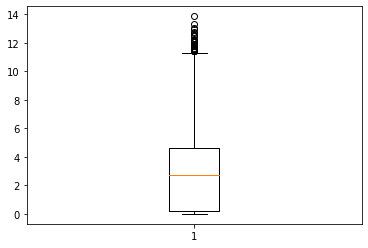

In [54]:
import matplotlib.pyplot as plt
plt.boxplot(exp_data)